2025-03-18 01:55:46,199 - INFO - Loading dataset for Device Layer Autoencoder training...
2025-03-18 01:55:56,308 - INFO - Training Autoencoder for Device Layer...


Epoch 1/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 349us/step - loss: 0.3835 - val_loss: 0.2087
Epoch 2/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 340us/step - loss: 0.2050 - val_loss: 0.1971
Epoch 3/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 340us/step - loss: 0.1943 - val_loss: 0.1946
Epoch 4/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 342us/step - loss: 0.1901 - val_loss: 0.1917
Epoch 5/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 339us/step - loss: 0.1873 - val_loss: 0.1868
Epoch 6/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 338us/step - loss: 0.1864 - val_loss: 0.1862
Epoch 7/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 338us/step - loss: 0.1873 - val_loss: 0.1861
Epoch 8/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 338us/step - loss: 0.1861 - val_loss: 0.1860
Epoch 9/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 337us/step - loss: 0.1854 - val_loss: 0.1852
Epoch 10/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 338us/step - loss: 0.1859 - val_loss: 0.1857
Epoch 11/20
14190/14190 ━━━━━━━━━━━━━━━━━━━━ 5s 342us/step - loss: 0.1865 - val

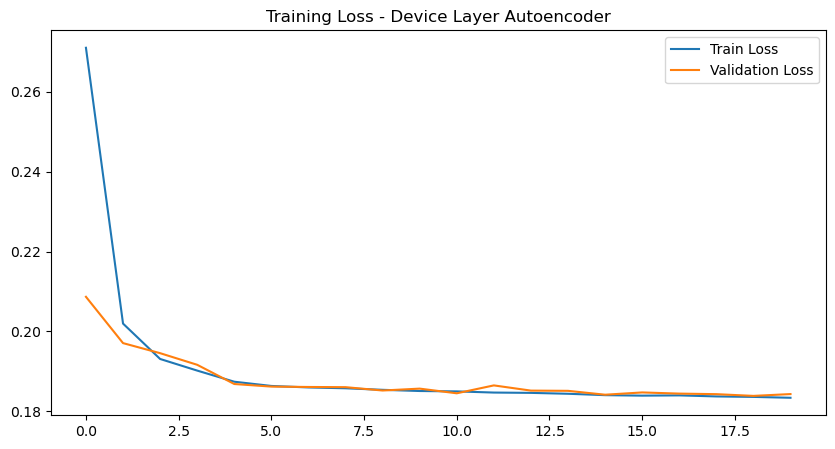

2025-03-18 01:57:34,710 - INFO - Evaluating Reconstruction Errors...


14190/14190 ━━━━━━━━━━━━━━━━━━━━ 2s 159us/step


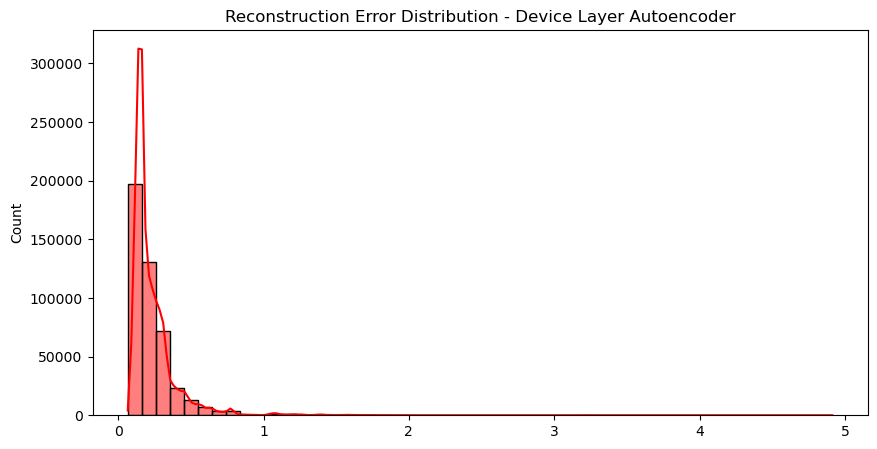

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Load dataset
logging.info("Loading dataset for Device Layer Autoencoder training...")
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(DATASET_PATH)

# Device Layer Selected Features
DEVICE_FEATURES = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Min",
    "Idle Max", "Hour", "Weekday", "Elapsed_Time"
]

# Standardize Features
scaler = StandardScaler()
df[DEVICE_FEATURES] = scaler.fit_transform(df[DEVICE_FEATURES])

# Split into train & test sets
X_train, X_test = train_test_split(df[DEVICE_FEATURES], test_size=0.2, random_state=42)

# Define Autoencoder Architecture
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation="relu")(input_layer)
encoded = Dense(4, activation="relu")(encoded)
decoded = Dense(8, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Train Autoencoder
logging.info("Training Autoencoder for Device Layer...")
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=1
)

# Save trained model
MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Device_Layer_AE.keras"
autoencoder.save(MODEL_PATH)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training Loss - Device Layer Autoencoder")
plt.show()

# Evaluate Reconstruction Errors
logging.info("Evaluating Reconstruction Errors...")
reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.abs(X_test - reconstructed), axis=1)

# Plot reconstruction error distribution
plt.figure(figsize=(10, 5))
sns.histplot(reconstruction_errors, bins=50, kde=True, color="red")
plt.title("Reconstruction Error Distribution - Device Layer Autoencoder")
plt.show()

2025-03-18 11:09:08,026 - INFO - Loading dataset for Autoencoder evaluation...
2025-03-18 11:09:17,178 - INFO - Loading Device Layer AE model...
2025-03-18 11:09:17,371 - INFO - Extracting Autoencoder reconstruction errors...


70948/70948 ━━━━━━━━━━━━━━━━━━━━ 12s 163us/step


2025-03-18 11:09:33,838 - INFO - Generating classification report...



Autoencoder Classification Report:


2025-03-18 11:09:35,437 - INFO - Generating ROC Curve...


              precision    recall  f1-score   support

           0       0.68      0.94      0.79   1573665
           1       0.13      0.02      0.04    696652

    accuracy                           0.66   2270317
   macro avg       0.40      0.48      0.41   2270317
weighted avg       0.51      0.66      0.56   2270317



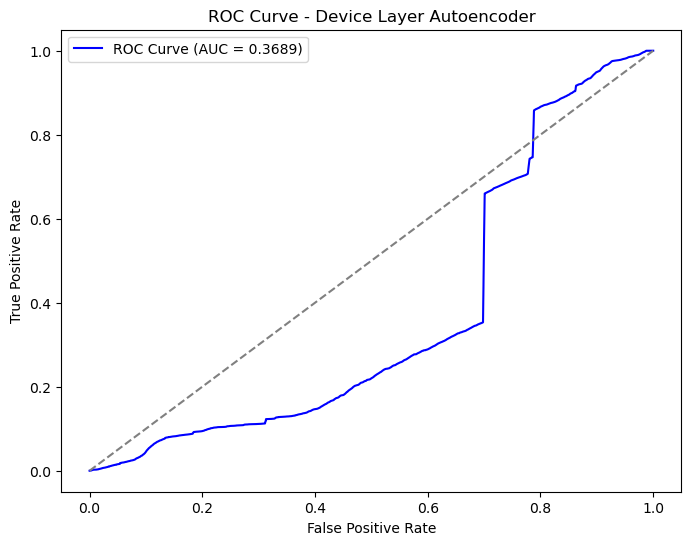

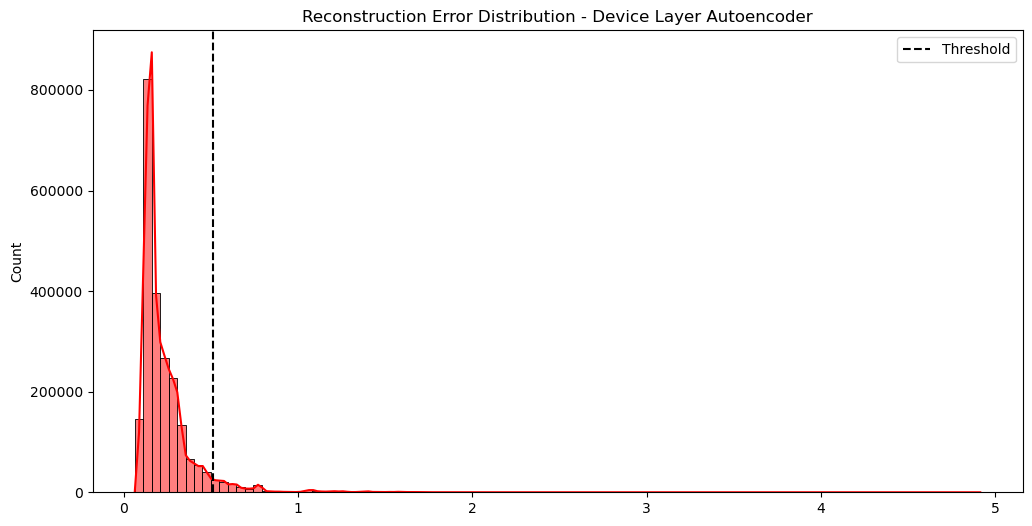

2025-03-18 11:09:38,114 - INFO - Autoencoder evaluation complete.


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File Paths
DEVICE_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Device_Layer_AE.keras"
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load Dataset
logging.info("Loading dataset for Autoencoder evaluation...")
df = pd.read_csv(DATASET_PATH)

# Device Layer Selected Features
DEVICE_FEATURES = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Min",
    "Idle Max", "Hour", "Weekday", "Elapsed_Time"
]

# Standardize Features
scaler = StandardScaler()
df[DEVICE_FEATURES] = scaler.fit_transform(df[DEVICE_FEATURES])

# Load Trained Autoencoder Model
logging.info("Loading Device Layer AE model...")
device_model = load_model(DEVICE_MODEL_PATH)

# ======================= Convert Labels to Binary (Benign vs Attack) =======================
if "Label" in df.columns:
    label_mapping = {"Benign": 0}  # Assign 0 to Benign
    attack_classes = df["Label"].unique()
    for attack in attack_classes:
        if attack != "Benign":
            label_mapping[attack] = 1  # Assign 1 to all attack types
    
    df["Binary_Label"] = df["Label"].map(label_mapping)
    labels = df["Binary_Label"].values  # Use binary labels (0 = Benign, 1 = Attack)
else:
    logging.error("Error: 'Label' column not found in dataset!")
    raise KeyError("Column 'Label' not found in dataset.")

X_device = df[DEVICE_FEATURES].values

# ======================= Autoencoder Reconstruction Error =======================
def get_autoencoder_reconstruction_error(model, X):
    """
    Computes the reconstruction error for an autoencoder model.
    """
    reconstructed = model.predict(X)
    return np.mean(np.abs(X - reconstructed), axis=1)

logging.info("Extracting Autoencoder reconstruction errors...")
reconstruction_errors = get_autoencoder_reconstruction_error(device_model, X_device)

# ======================= Compute Threshold for Anomalies =======================
threshold = np.percentile(reconstruction_errors, 95)
predictions = (reconstruction_errors > threshold).astype(int)  # 1 = Anomaly, 0 = Normal

# ======================= Classification Report =======================
logging.info("Generating classification report...")
print("\nAutoencoder Classification Report:")
print(classification_report(labels, predictions, zero_division=1))

# ======================= Binary ROC Curve =======================
logging.info("Generating ROC Curve...")
fpr, tpr, _ = roc_curve(labels, reconstruction_errors)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Device Layer Autoencoder")
plt.legend()
plt.show()

# ======================= Visualize Reconstruction Errors =======================
plt.figure(figsize=(12, 6))
sns.histplot(reconstruction_errors, bins=100, kde=True, color='red')
plt.axvline(threshold, color='black', linestyle="--", label="Threshold")
plt.title("Reconstruction Error Distribution - Device Layer Autoencoder")
plt.legend()
plt.show()

logging.info("Autoencoder evaluation complete.")

2025-03-18 11:17:55,603 - INFO - Loading dataset for feature validation...


<Figure size 1500x800 with 0 Axes>

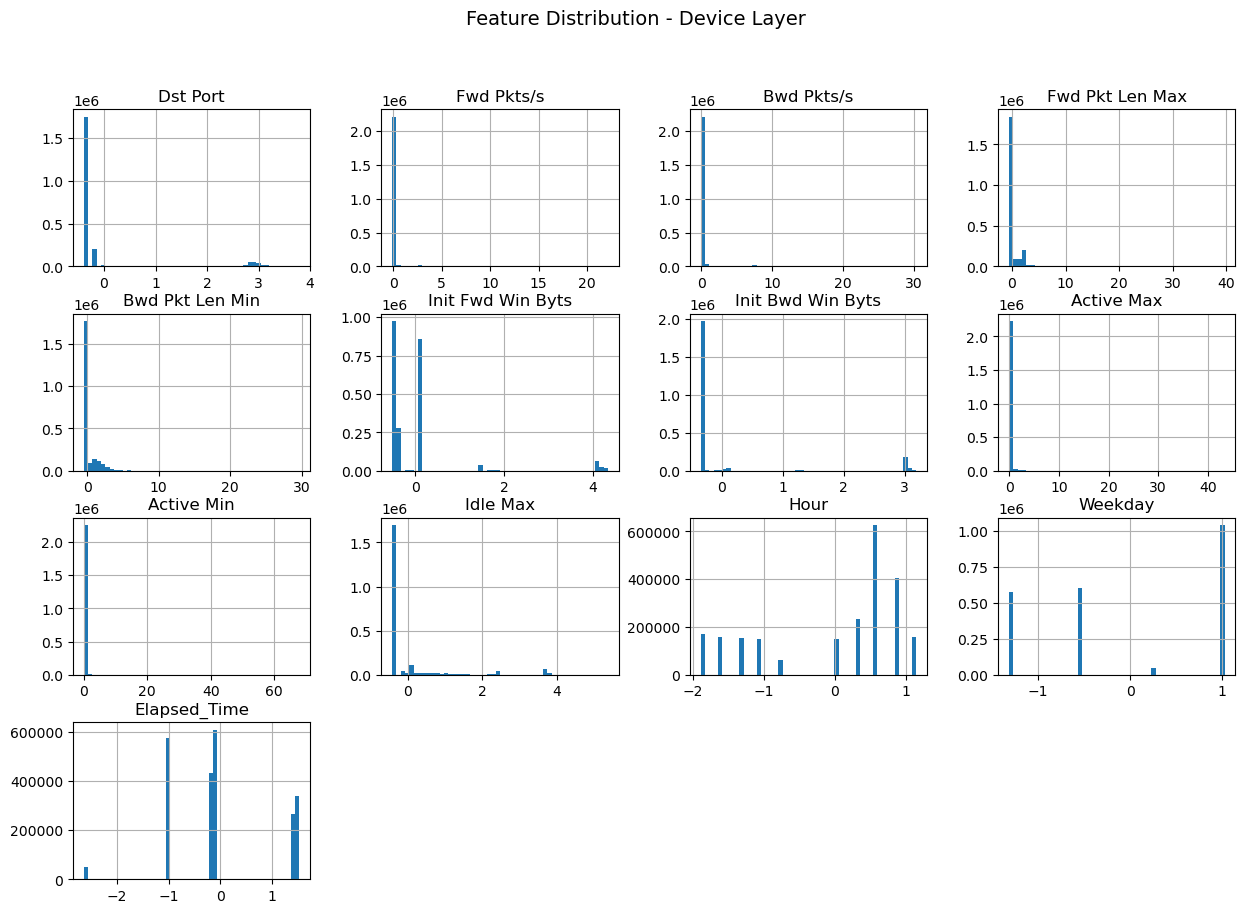

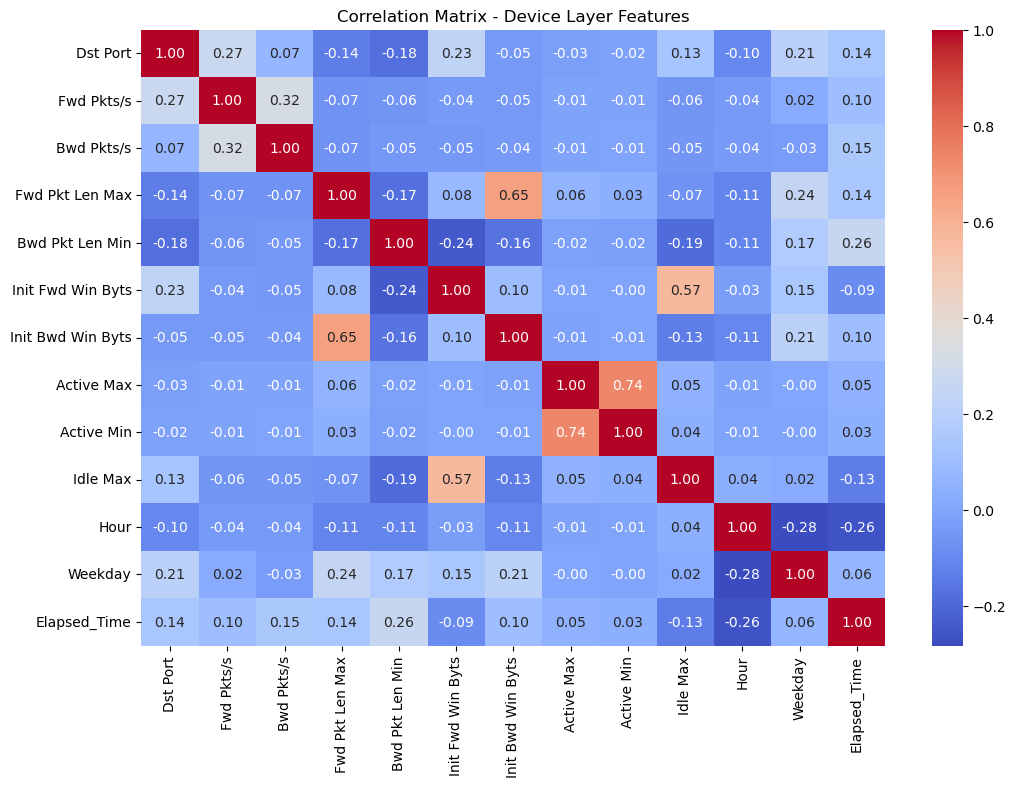

2025-03-18 11:18:06,727 - INFO - Running PCA analysis...


ValueError: Could not interpret value `PCA1` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x600 with 0 Axes>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File Path
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load Dataset
logging.info("Loading dataset for feature validation...")
df = pd.read_csv(DATASET_PATH)

# Device Layer Selected Features
DEVICE_FEATURES = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Min",
    "Idle Max", "Hour", "Weekday", "Elapsed_Time"
]

# Standardize Features
scaler = StandardScaler()
df[DEVICE_FEATURES] = scaler.fit_transform(df[DEVICE_FEATURES])

# =================== Feature Distribution Analysis ===================
plt.figure(figsize=(15, 8))
df[DEVICE_FEATURES].hist(bins=50, figsize=(15, 10))
plt.suptitle("Feature Distribution - Device Layer", fontsize=14)
plt.show()

# =================== Correlation Matrix ===================
plt.figure(figsize=(12, 8))
sns.heatmap(df[DEVICE_FEATURES].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Device Layer Features")
plt.show()

# =================== PCA Analysis for Feature Separability ===================
logging.info("Running PCA analysis...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[DEVICE_FEATURES])

df_pca = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])
df_pca["Label"] = df["Label"]  # Assuming "Label" column exists

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df_pca["Label"], palette="coolwarm", alpha=0.6)
plt.title("PCA Analysis - Anomaly vs Normal Traffic")
plt.show()

# =================== t-SNE Analysis for Feature Separability ===================
logging.info("Running t-SNE analysis...")
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
tsne_result = tsne.fit_transform(df[DEVICE_FEATURES])

df_tsne = pd.DataFrame(data=tsne_result, columns=["TSNE1", "TSNE2"])
df_tsne["Label"] = df["Label"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", hue=df_tsne["Label"], palette="coolwarm", alpha=0.6)
plt.title("t-SNE Analysis - Anomaly vs Normal Traffic")
plt.show()

# =================== Feature Separability Histograms ===================
plt.figure(figsize=(15, 10))
for i, feature in enumerate(DEVICE_FEATURES[:6]):  # Plot first 6 features
    plt.subplot(2, 3, i+1)
    sns.histplot(df, x=feature, hue="Label", bins=50, kde=True, alpha=0.7)
    plt.title(f"Feature Distribution: {feature}")

plt.tight_layout()
plt.show()

logging.info("Feature validation complete. Assess the separability before training VAE.")

In [14]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(file_path)

# Ensure timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Elapsed_Time'], unit='s')  # Assuming Elapsed_Time is in seconds

# Extract hour and weekday
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.weekday  # Monday=0, Sunday=6

# Apply cyclical encoding
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday'] / 7)

# Drop original columns (Optional, but recommended)
df.drop(columns=['Hour', 'Weekday'], inplace=True)

# Save the updated dataset
output_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df.to_csv(output_path, index=False)

print("Cyclical encoding added and dataset saved successfully!")

Cyclical encoding added and dataset saved successfully!


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import logging
import shap

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load the dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define Device Layer Features ===
# These features capture endpoint-specific behaviors:
# - Dst Port: Unusual service usage.
# - Fwd/Bwd Pkt Len Max/Min: Abnormal packet sizes.
# - Idle Max, Active Min, Active Max: Host activity anomalies.
# - Init Fwd/Bwd Win Byts: TCP window anomalies.
# - Hour_sin, Hour_cos: Capturing cyclical time patterns.
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Hour_sin", "Hour_cos"
]

X = df[device_features]
# Optionally, if you have ground-truth labels for evaluation:
# y = df["Label"]

# === Step 3: Preprocess Data ===
# Scale features so that Isolation Forest performs optimally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# === Step 4: Train the Isolation Forest Model ===
# Key parameters:
# - n_estimators: Number of trees; higher can improve accuracy.
# - contamination: Estimated fraction of anomalies (e.g., 2% if you expect ~2% anomalies).
# - n_jobs=-1: Utilize all CPU cores.
isolation_forest = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination=0.02,    # Adjust this based on domain knowledge/experiments.
    random_state=42,
    n_jobs=-1
)

logging.info("Training Isolation Forest on Device Layer features...")
isolation_forest.fit(X_scaled)
logging.info("Isolation Forest training completed.")

# === Step 5: Make Predictions ===
# By default, Isolation Forest returns:
# -1 for anomalies and 1 for normal instances.
predictions = isolation_forest.predict(X_scaled)

# Convert predictions to binary labels: Anomaly = 1, Normal = 0
df["IF_Prediction"] = np.where(predictions == -1, 1, 0)

# Display prediction distribution
pred_counts = df["IF_Prediction"].value_counts()
logging.info("Isolation Forest Prediction Distribution:")
print(pred_counts)

# === Step 6: Evaluation Strategies ===
# If ground-truth labels are available, evaluate the model.
# Note: Isolation Forest is unsupervised, so evaluation should be interpreted carefully.
# For example, compare predictions with actual anomalies (if labelled).
# y_true = (your ground truth labels: anomaly=1, normal=0)
# Here, we assume that anomalies correspond to a specific class label in your dataset.
# Uncomment and modify if ground-truth is available.
#
# y_true = ...  # Define your true binary labels for the device layer.
# print(classification_report(y_true, df["IF_Prediction"]))
#
# Additionally, you can compute a confusion matrix:
# print(confusion_matrix(y_true, df["IF_Prediction"]))

# To save the model (requires joblib or pickle)
import joblib
joblib.dump(isolation_forest, "device_layer_isolation_forest.pkl")
logging.info("Model and predictions saved successfully.")

2025-03-19 21:28:49,761 - INFO - Dataset loaded successfully.
2025-03-19 21:28:49,882 - INFO - Features scaled successfully.
2025-03-19 21:28:49,882 - INFO - Training Isolation Forest on Device Layer features...
2025-03-19 21:29:04,192 - INFO - Isolation Forest training completed.
2025-03-19 21:29:17,134 - INFO - Isolation Forest Prediction Distribution:
2025-03-19 21:29:17,177 - INFO - Model and predictions saved successfully.


IF_Prediction
0    2224910
1      45407
Name: count, dtype: int64


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import logging
import joblib

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load the dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define Device Layer Features ===
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Hour_sin", "Hour_cos"
]

X = df[device_features]

# === Step 3: Preprocess Data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# === Step 4: Train the Isolation Forest Model ===
# Using 'auto' for contamination allows the model to estimate the anomaly rate.
isolation_forest = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination="auto",  # Let the model estimate the fraction of anomalies
    random_state=42,
    n_jobs=-1
)

logging.info("Training Isolation Forest on Device Layer features...")
isolation_forest.fit(X_scaled)
logging.info("Isolation Forest training completed.")

# === Step 5: Make Predictions ===
predictions = isolation_forest.predict(X_scaled)
# Convert predictions to binary labels: Anomaly = 1, Normal = 0
df["IF_Prediction"] = np.where(predictions == -1, 1, 0)
pred_counts = df["IF_Prediction"].value_counts()
logging.info("Isolation Forest Prediction Distribution:")
print(pred_counts)

# === Step 6: Save the Model and Predictions ===
joblib.dump(isolation_forest, "device_layer_isolation_forest.pkl")
df.to_csv("Device_Layer_IF_Predictions.csv", index=False)
logging.info("Isolation Forest model and predictions saved successfully.")

2025-03-19 21:37:25,261 - INFO - Dataset loaded successfully.
2025-03-19 21:37:25,389 - INFO - Features scaled successfully.
2025-03-19 21:37:25,390 - INFO - Training Isolation Forest on Device Layer features...
2025-03-19 21:37:26,933 - INFO - Isolation Forest training completed.
2025-03-19 21:37:41,192 - INFO - Isolation Forest Prediction Distribution:


IF_Prediction
0    1968482
1     301835
Name: count, dtype: int64


2025-03-19 21:38:40,561 - INFO - Isolation Forest model and predictions saved successfully.


Prediction Distribution:
IF_Prediction
0    1968482
1     301835
Name: count, dtype: int64

Anomaly Rate: 13.29%

Descriptive Statistics for Normal Samples:
           Dst Port  Fwd Pkt Len Max  Bwd Pkt Len Min      Idle Max  \
count  1.968482e+06     1.968482e+06     1.968482e+06  1.968482e+06   
mean   5.030394e+03     1.083364e+02     2.516990e+01  4.579607e+06   
std    1.464610e+04     2.121327e+02     4.915121e+01  1.222418e+07   
min    0.000000e+00     0.000000e+00     0.000000e+00  0.000000e+00   
25%    5.300000e+01     0.000000e+00     0.000000e+00  0.000000e+00   
50%    8.000000e+01     3.000000e+01     0.000000e+00  0.000000e+00   
75%    4.430000e+02     4.900000e+01     0.000000e+00  0.000000e+00   
max    6.553400e+04     1.460000e+03     9.300000e+02  1.199900e+08   

         Active Min    Active Max  Init Fwd Win Byts  Init Bwd Win Byts  \
count  1.968482e+06  1.968482e+06       1.968482e+06       1.968482e+06   
mean   2.336478e+03  1.334985e+04       3.889913e+03 

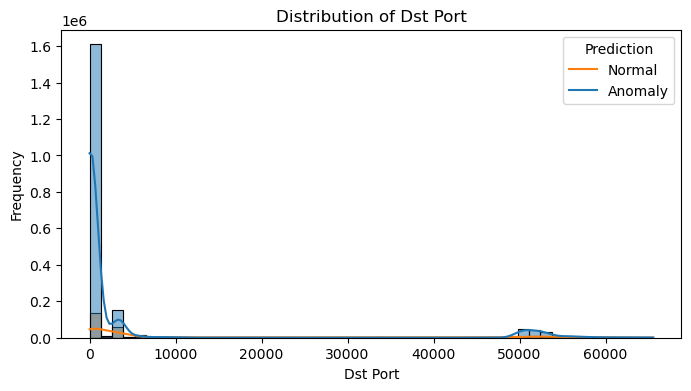

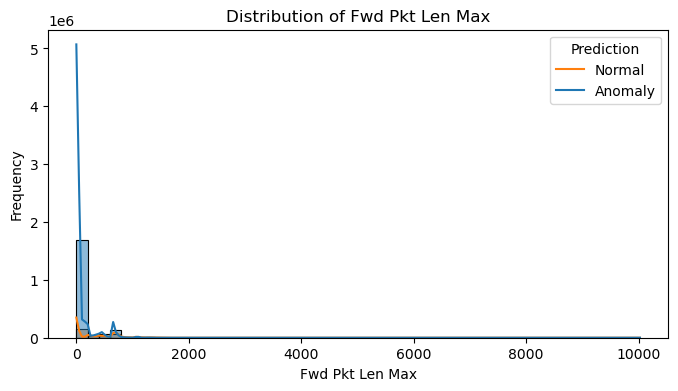

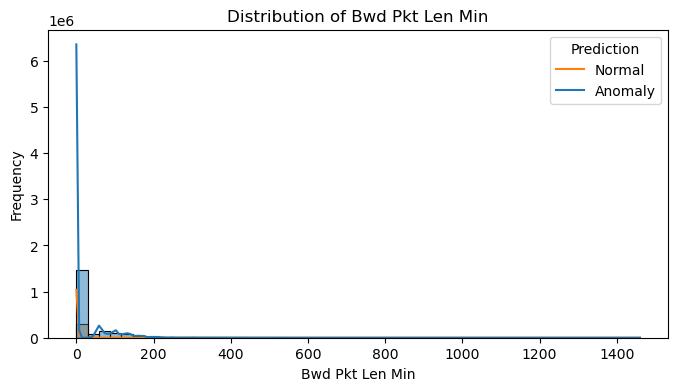

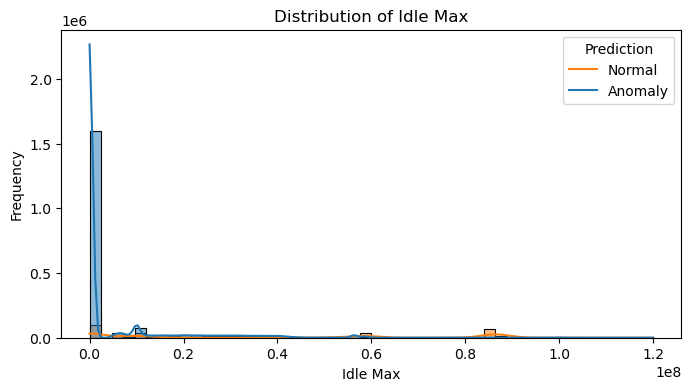

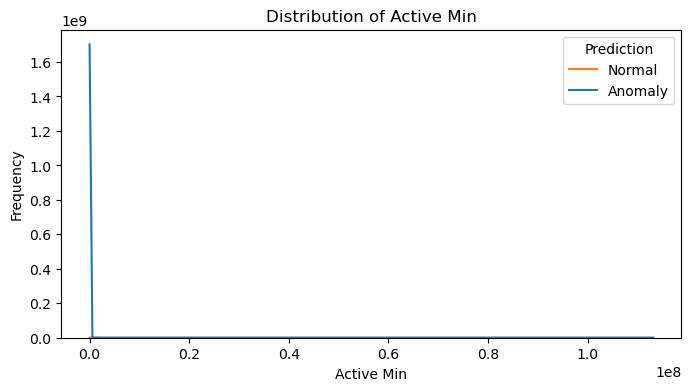

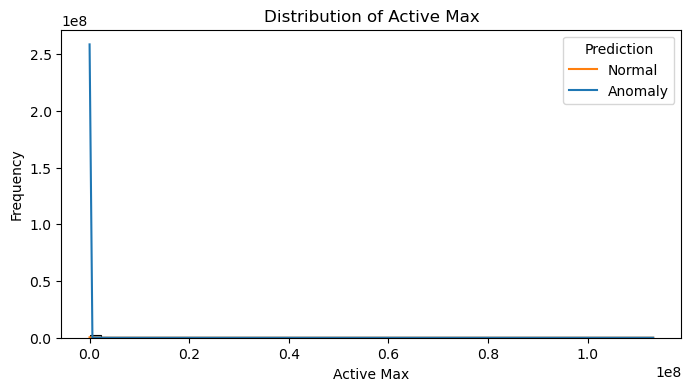

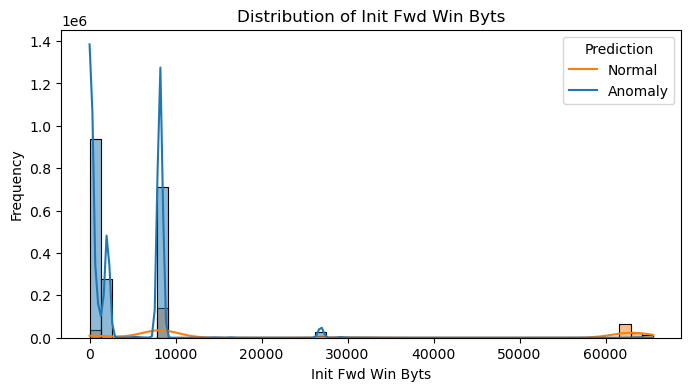

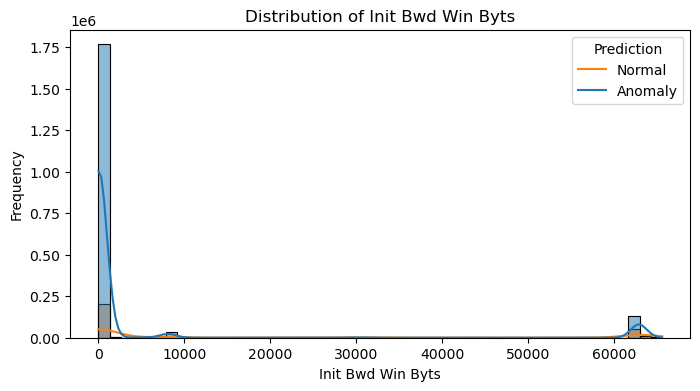

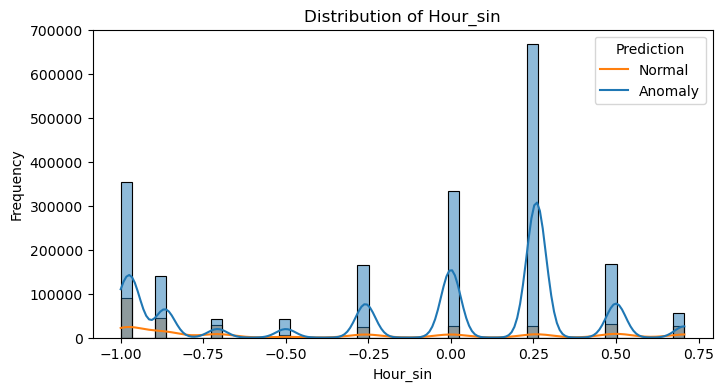

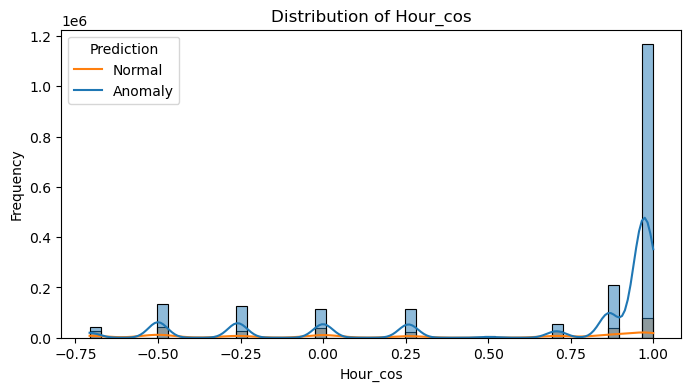

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "Device_Layer_IF_Predictions.csv"
df = pd.read_csv(file_path)

# Display overall prediction distribution
print("Prediction Distribution:")
pred_counts = df["IF_Prediction"].value_counts()
print(pred_counts)

# Calculate and display anomaly rate
total_samples = len(df)
anomaly_rate = (pred_counts.get(1, 0) / total_samples) * 100
print(f"\nAnomaly Rate: {anomaly_rate:.2f}%")

# Define a list of key device features for further analysis
features_to_analyze = [
    "Dst Port", 
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", 
    "Idle Max", "Active Min", "Active Max", 
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Hour_sin", "Hour_cos"
]

# Separate data into normal and anomalous samples
df_normal = df[df["IF_Prediction"] == 0]
df_anomaly = df[df["IF_Prediction"] == 1]

# Compute descriptive statistics for the selected features
stats_normal = df_normal[features_to_analyze].describe()
stats_anomaly = df_anomaly[features_to_analyze].describe()

print("\nDescriptive Statistics for Normal Samples:")
print(stats_normal)
print("\nDescriptive Statistics for Anomalous Samples:")
print(stats_anomaly)

# Plot histograms for each feature comparing normal and anomalous samples
for feature in features_to_analyze:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue="IF_Prediction", bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend(title="Prediction", labels=["Normal", "Anomaly"])
    plt.show()

In [10]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Load the CSV file with predictions
df = pd.read_csv("Device_Layer_IF_Predictions.csv")

# Assuming the original ground truth is in a column "Label"
# and that "Benign" corresponds to normal (0) and any other label is treated as anomalous (1).
# Adjust this mapping as necessary.
df['Binary_Label'] = df['Label'].apply(lambda x: 0 if x.lower() == 'benign' else 1)

y_true = df['Binary_Label']
y_pred = df['IF_Prediction']

# Generate a classification report (as a dictionary for further processing)
report_dict = classification_report(y_true, y_pred, target_names=["Normal", "Anomaly"], output_dict=True)

# Print overall report
print("Overall Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Anomaly"]))

# Extract and display label-specific insights
print("\nLabel-Specific Insights:")
for label in ["Normal", "Anomaly"]:
    metrics = report_dict[label]
    precision = metrics.get("precision", 0)
    recall = metrics.get("recall", 0)
    f1 = metrics.get("f1-score", 0)
    support = metrics.get("support", 0)
    print(f"\nLabel: {label}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  Support:   {support}")

# Also print the confusion matrix for further insight
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

Overall Classification Report:
              precision    recall  f1-score   support

      Normal       0.65      0.82      0.73   1573665
     Anomaly       0.06      0.02      0.03    696652

    accuracy                           0.58   2270317
   macro avg       0.36      0.42      0.38   2270317
weighted avg       0.47      0.58      0.51   2270317


Label-Specific Insights:

Label: Normal
  Precision: 0.6547
  Recall:    0.8190
  F1-Score:  0.7277
  Support:   1573665.0

Label: Anomaly
  Precision: 0.0561
  Recall:    0.0243
  F1-Score:  0.0339
  Support:   696652.0

Confusion Matrix:
[[1288755  284910]
 [ 679727   16925]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import logging
import joblib

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load the dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define Device Layer Features ===
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Hour_sin", "Hour_cos"
]

X = df[device_features]

# === Step 3: Preprocess Data (Standard Scaling) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# === Step 4: Train the Isolation Forest Model ===
# Contamination manually set to 2% based on domain knowledge
contamination_value = 0.02  # Adjust if needed

isolation_forest = IsolationForest(
    n_estimators=300,      # Sufficient trees for robust results
    max_samples="auto",    # Uses all available data
    contamination=contamination_value,  # Fixed contamination rate
    random_state=42,       # Reproducibility
    n_jobs=-1              # Parallel processing for faster training
)

logging.info("Training Isolation Forest on Device Layer features...")
isolation_forest.fit(X_scaled)
logging.info("Isolation Forest training completed.")

# === Step 5: Make Predictions ===
predictions = isolation_forest.predict(X_scaled)
df["IF_Prediction"] = np.where(predictions == -1, 1, 0)  # Convert to 1 (Anomaly) / 0 (Normal)

# Display Prediction Distribution
pred_counts = df["IF_Prediction"].value_counts()
logging.info("Isolation Forest Prediction Distribution:")
print(pred_counts)

2025-03-19 22:30:00,069 - INFO - Dataset loaded successfully.
2025-03-19 22:30:00,191 - INFO - Features scaled successfully.
2025-03-19 22:30:00,194 - INFO - Training Isolation Forest on Device Layer features...
2025-03-19 22:30:14,484 - INFO - Isolation Forest training completed.
2025-03-19 22:30:27,205 - INFO - Isolation Forest Prediction Distribution:


IF_Prediction
0    2224910
1      45407
Name: count, dtype: int64


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# === Step 1: Load Predictions & Dataset ===
file_path = "Device_Layer_IF_Predictions.csv"  # Update path if needed
df = pd.read_csv(file_path)

# === Step 2: Define Ground-Truth Labels ===
# Mark attack classes as "1" (Anomaly) and Benign as "0" (Normal)
df["True_Label"] = df["Label"].apply(lambda x: 1 if x in [
    "DDoS attacks-LOIC-HTTP", "Infilteration", "DoS attacks-GoldenEye",
    "DoS attacks-Slowloris", "Brute Force -Web", "Brute Force -XSS"
] else 0)

# === Step 3: Compute Confusion Matrix ===
cm = confusion_matrix(df["True_Label"], df["IF_Prediction"])
print("Confusion Matrix:\n", cm)

# === Step 4: Compute Precision, Recall, and F1-Score ===
print("\nClassification Report:\n", classification_report(df["True_Label"], df["IF_Prediction"]))

# === Step 5: Breakdown of Anomalies Detected per Attack Type ===
attack_counts = df[df["IF_Prediction"] == 1]["Label"].value_counts()
print("\nBreakdown of Anomalies Detected:\n", attack_counts)

Confusion Matrix:
 [[1288755  284910]
 [ 679727   16925]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.73   1573665
           1       0.06      0.02      0.03    696652

    accuracy                           0.58   2270317
   macro avg       0.36      0.42      0.38   2270317
weighted avg       0.47      0.58      0.51   2270317


Breakdown of Anomalies Detected:
 Label
Benign                   284910
Infilteration             10258
DoS attacks-Slowloris      4913
DoS attacks-GoldenEye      1620
Brute Force -Web            129
Brute Force -XSS              5
Name: count, dtype: int64


2025-03-19 22:46:44,251 - INFO - Dataset loaded successfully.
2025-03-19 22:46:44,385 - INFO - Features scaled successfully.
2025-03-19 22:46:44,387 - INFO - Training Isolation Forest on Device Layer features...
2025-03-19 22:46:45,783 - INFO - Isolation Forest training completed.


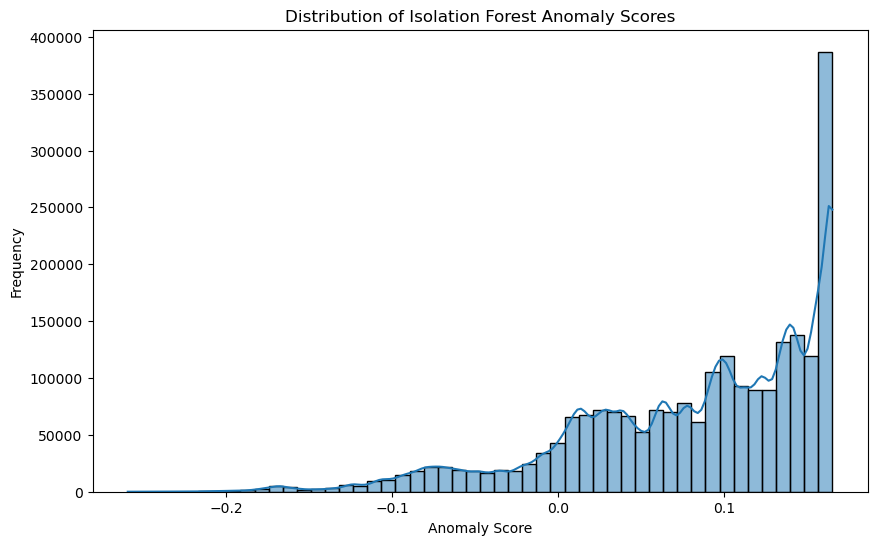

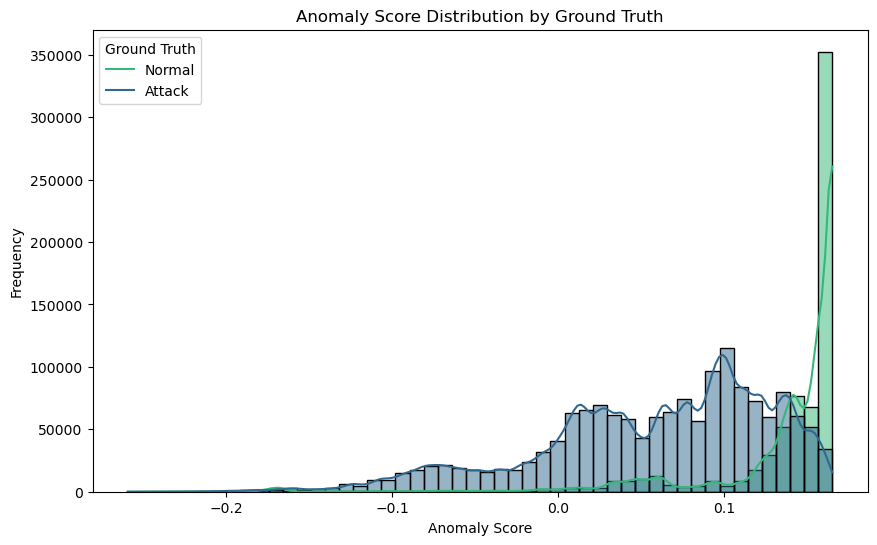

2025-03-19 22:47:16,097 - INFO - Anomaly score analysis complete.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import logging

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# Load dataset
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# Define Device Layer Features
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Hour_sin", "Hour_cos"
]

X = df[device_features]

# Preprocess: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# Train Isolation Forest with 'auto' contamination
isolation_forest = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination="auto",  # Let the model estimate the anomaly fraction
    random_state=42,
    n_jobs=-1
)
logging.info("Training Isolation Forest on Device Layer features...")
isolation_forest.fit(X_scaled)
logging.info("Isolation Forest training completed.")

# Get raw anomaly scores (decision function)
anomaly_scores = isolation_forest.decision_function(X_scaled)

# Add scores and predictions to DataFrame
df["IF_Score"] = anomaly_scores
predictions = isolation_forest.predict(X_scaled)
df["IF_Prediction"] = np.where(predictions == -1, 1, 0)

# Plot distribution of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, bins=50, kde=True)
plt.title("Distribution of Isolation Forest Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

# Optional: Compare anomaly scores for known attack samples vs. normal samples
# Assuming ground truth labels are in "Label" where 'Benign' is normal and others are attacks.
df['Binary_Label'] = df['Label'].apply(lambda x: 0 if x.lower() == 'benign' else 1)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="IF_Score", hue="Binary_Label", bins=50, kde=True, palette="viridis")
plt.title("Anomaly Score Distribution by Ground Truth")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend(title="Ground Truth", labels=["Normal", "Attack"])
plt.show()

# Next steps:
# 1. Analyze these plots to determine if there is a clear separation between normal and attack scores.
# 2. Experiment with different thresholds on the anomaly score to improve anomaly detection.
# 3. Integrate these scores into your fusion layer along with the Global (XGBoost) and Edge (LSTM) predictions.

logging.info("Anomaly score analysis complete.")

2025-03-19 23:16:35,280 - INFO - Dataset loaded successfully.
2025-03-19 23:16:35,403 - INFO - Features scaled successfully.
2025-03-19 23:16:35,403 - INFO - Training Isolation Forest on Device Layer features...
2025-03-19 23:16:36,813 - INFO - Isolation Forest training completed.
2025-03-19 23:16:49,560 - INFO - Dynamic Threshold (2nd percentile over last 10000 samples): -0.1009
2025-03-19 23:16:49,571 - INFO - Dynamic Threshold Isolation Forest Prediction Distribution:


IF_Anomaly
0    2221297
1      49020
Name: count, dtype: int64


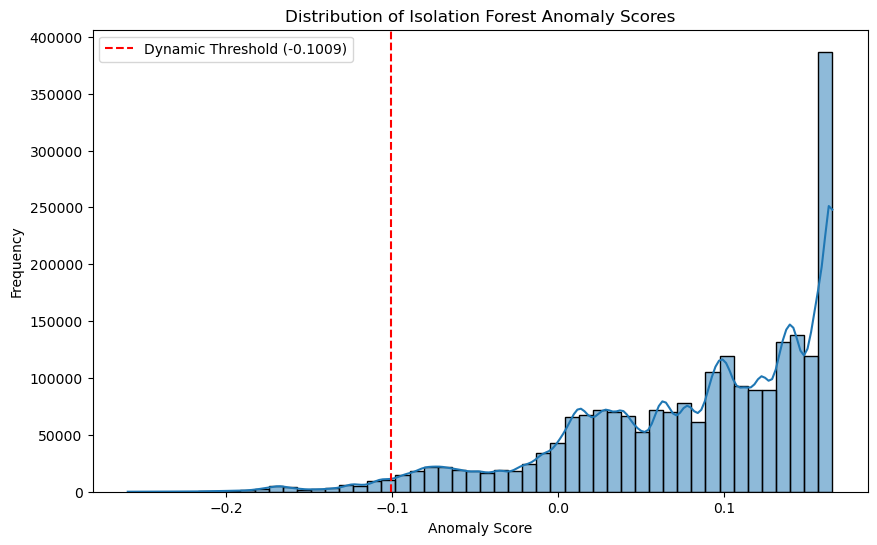

2025-03-19 23:17:47,930 - INFO - Isolation Forest model and dynamic predictions saved successfully.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import logging
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load the dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define Device Layer Features ===
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Idle Max", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Hour_sin", "Hour_cos"
]

X = df[device_features]

# === Step 3: Preprocess Data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# === Step 4: Train the Isolation Forest Model with Auto Contamination ===
isolation_forest = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination="auto",  # Let the model estimate the fraction of anomalies dynamically
    random_state=42,
    n_jobs=-1
)
logging.info("Training Isolation Forest on Device Layer features...")
isolation_forest.fit(X_scaled)
logging.info("Isolation Forest training completed.")

# === Step 5: Extract Anomaly Scores ===
# The decision function returns a score: lower scores indicate more anomalous instances.
df["IF_Score"] = isolation_forest.decision_function(X_scaled)

# === Step 6: Implement Dynamic Adaptive Thresholding ===
# Define a rolling window size (e.g., last 10,000 samples) to compute a dynamic threshold
window_size = 10000
# Compute the dynamic threshold as the 2nd percentile over the rolling window
rolling_window = df["IF_Score"].tail(window_size)
dynamic_threshold = np.percentile(rolling_window, 2)
logging.info(f"Dynamic Threshold (2nd percentile over last {window_size} samples): {dynamic_threshold:.4f}")

# Flag anomalies based on the dynamic threshold
df["IF_Anomaly"] = (df["IF_Score"] < dynamic_threshold).astype(int)

# Display updated prediction distribution based on dynamic threshold
pred_counts_dynamic = df["IF_Anomaly"].value_counts()
logging.info("Dynamic Threshold Isolation Forest Prediction Distribution:")
print(pred_counts_dynamic)

# === Step 7: Plot the Anomaly Score Distribution ===
plt.figure(figsize=(10, 6))
sns.histplot(df["IF_Score"], bins=50, kde=True)
plt.axvline(dynamic_threshold, color='red', linestyle='--', label=f"Dynamic Threshold ({dynamic_threshold:.4f})")
plt.title("Distribution of Isolation Forest Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# === Optional: Save the Updated Predictions and Model ===
joblib.dump(isolation_forest, "device_layer_isolation_forest.pkl")
df.to_csv("Device_Layer_IF_Predictions_Dynamic.csv", index=False)
logging.info("Isolation Forest model and dynamic predictions saved successfully.")

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

# Map labels to binary (0 = Normal, 1 = Attack)
df["Binary_Label"] = df["Label"].apply(lambda x: 0 if x == "Benign" else 1)

# Compute confusion matrix
cm = confusion_matrix(df["Binary_Label"], df["IF_Anomaly"])
print("Confusion Matrix:\n", cm)

# Compute classification report
report = classification_report(df["Binary_Label"], df["IF_Anomaly"], target_names=["Normal", "Anomaly"])
print("\nClassification Report:\n", report)

# Breakdown of flagged anomalies per attack type
anomaly_breakdown = df[df["IF_Anomaly"] == 1]["Label"].value_counts()
print("\nBreakdown of Detected Anomalies:\n", anomaly_breakdown)

Confusion Matrix:
 [[1532123   41542]
 [ 689174    7478]]

Classification Report:
               precision    recall  f1-score   support

      Normal       0.69      0.97      0.81   1573665
     Anomaly       0.15      0.01      0.02    696652

    accuracy                           0.68   2270317
   macro avg       0.42      0.49      0.41   2270317
weighted avg       0.52      0.68      0.57   2270317


Breakdown of Detected Anomalies:
 Label
Benign                   41542
DoS attacks-Slowloris     4762
Infilteration             1807
DoS attacks-GoldenEye      779
Brute Force -Web           126
Brute Force -XSS             4
Name: count, dtype: int64


In [6]:
for percentile in [1, 2, 3, 5]:
    threshold = np.percentile(df["IF_Score"].tail(10000), percentile)
    print(f"Threshold at {percentile}%: {threshold:.4f}")

Threshold at 1%: -0.1126
Threshold at 2%: -0.1009
Threshold at 3%: -0.0925
Threshold at 5%: -0.0872


In [10]:
# Define different thresholds
thresholds = [-0.1126, -0.1009, -0.0925, -0.0872]

for threshold in thresholds:
    # Apply threshold
    df["IF_Anomaly"] = (df["IF_Score"] < threshold).astype(int)

    # Count anomalies detected
    pred_counts = df["IF_Anomaly"].value_counts()
    print(f"\nThreshold: {threshold:.4f}")
    print("Anomaly Distribution:\n", pred_counts)

    # Compute confusion matrix if ground truth is available
    if "Binary_Label" in df.columns:
        from sklearn.metrics import confusion_matrix, classification_report
        cm = confusion_matrix(df["Binary_Label"], df["IF_Anomaly"])
        cr = classification_report(df["Binary_Label"], df["IF_Anomaly"])
        print("\nConfusion Matrix:\n", cm)
        print("\nClassification Report:\n", cr)


Threshold: -0.1126
Anomaly Distribution:
 IF_Anomaly
0    2235823
1      34494
Name: count, dtype: int64

Confusion Matrix:
 [[1546049   27616]
 [ 689774    6878]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.98      0.81   1573665
           1       0.20      0.01      0.02    696652

    accuracy                           0.68   2270317
   macro avg       0.45      0.50      0.42   2270317
weighted avg       0.54      0.68      0.57   2270317


Threshold: -0.1009
Anomaly Distribution:
 IF_Anomaly
0    2221258
1      49059
Name: count, dtype: int64

Confusion Matrix:
 [[1532085   41580]
 [ 689173    7479]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.81   1573665
           1       0.15      0.01      0.02    696652

    accuracy                           0.68   2270317
   macro avg       0.42      0.49      0.41   2270317
weighted avg       0.

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import logging
import joblib

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load the dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define the expanded Device Layer feature set ===
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]

X = df[device_features]

# === Step 3: Preprocess Data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# === Step 4: Train the Isolation Forest Model ===
# Using 'auto' contamination so the model estimates the anomaly fraction
isolation_forest = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination="auto",
    random_state=42,
    n_jobs=-1
)

logging.info("Training Isolation Forest with expanded device features...")
isolation_forest.fit(X_scaled)
logging.info("Isolation Forest training completed.")

# === Step 5: Make Predictions & Analyze Distribution ===
predictions = isolation_forest.predict(X_scaled)
df["IF_Prediction"] = np.where(predictions == -1, 1, 0)

pred_counts = df["IF_Prediction"].value_counts()
logging.info("Isolation Forest Prediction Distribution:")
print(pred_counts)

2025-03-20 00:01:15,492 - INFO - Dataset loaded successfully.
2025-03-20 00:01:15,760 - INFO - Features scaled successfully.
2025-03-20 00:01:15,762 - INFO - Training Isolation Forest with expanded device features...
2025-03-20 00:01:17,251 - INFO - Isolation Forest training completed.
2025-03-20 00:01:30,689 - INFO - Isolation Forest Prediction Distribution:


IF_Prediction
0    1942132
1     328185
Name: count, dtype: int64


In [18]:
for percentile in [1, 2, 3, 5]:
    threshold = np.percentile(df["IF_Prediction"].tail(10000), percentile)
    print(f"Threshold at {percentile}%: {threshold:.4f}")

Threshold at 1%: 0.0000
Threshold at 2%: 0.0000
Threshold at 3%: 0.0000
Threshold at 5%: 0.0000


In [20]:
# === (Optional) Step 6: Save the Model and Predictions ===
joblib.dump(isolation_forest, "device_layer_isolation_forest_expanded.pkl")
df.to_csv("Device_Layer_IF_Predictions_Expanded.csv", index=False)
logging.info("Model and predictions saved successfully.")

2025-03-20 00:08:11,014 - INFO - Model and predictions saved successfully.


In [22]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Load the updated predictions CSV (assuming it's saved as Device_Layer_IF_Predictions_Expanded.csv)
df = pd.read_csv("Device_Layer_IF_Predictions_Expanded.csv")

# Map ground truth labels to binary:
# 0 = Normal (Benign) and 1 = Attack (all other labels, including infiltration, DoS, etc.)
df["Binary_Label"] = df["Label"].apply(lambda x: 0 if x.lower() == "benign" else 1)

# Get the predicted labels from Isolation Forest (IF_Prediction column)
y_true = df["Binary_Label"]
y_pred = df["IF_Prediction"]

# Compute the confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=["Normal", "Anomaly"])

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[1267927  305738]
 [ 674205   22447]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.65      0.81      0.72   1573665
     Anomaly       0.07      0.03      0.04    696652

    accuracy                           0.57   2270317
   macro avg       0.36      0.42      0.38   2270317
weighted avg       0.47      0.57      0.51   2270317



In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib
import logging

# Configure Logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load Dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define Full Device Layer Features ===
device_features = [
    # Network-Level Features
    "Dst Port",  # Checks which services are targeted

    # Packet Behavior Features
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",  # Max & Min lengths in fwd/bwd direction
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",  # Variability in packet sizes

    # Timing & Flow Features
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",  # Flow-level activity
    "Idle Max", "Idle Mean", "Active Min", "Active Max",  # Session behavior

    # Header & TCP Window Features
    "Init Fwd Win Byts", "Init Bwd Win Byts",  # TCP window sizes
    "Fwd Header Len", "Bwd Header Len",  # Packet header lengths

    # Entropy-Based Features
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",  # Anomalies in segmentation

    # Cyclical Time Features
    "Hour_sin", "Hour_cos"  # Time-based activity
]

X = df[device_features]
y = df["Label"]  # Target variable

# === Step 3: Encode Labels & Normalize Features ===
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler & encoder for later use
joblib.dump(scaler, "mlp_device_scaler.pkl")
joblib.dump(label_encoder, "mlp_label_encoder.pkl")
logging.info("Feature scaling and label encoding completed.")

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
logging.info(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# === Step 5: Define MLP Model Architecture ===
mlp_model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Explicit input layer
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

logging.info("MLP Model compiled successfully.")

# === Step 6: Train Model ===
history = mlp_model.fit(X_train, y_train, 
                        epochs=25, batch_size=64, 
                        validation_data=(X_test, y_test), 
                        verbose=2)

logging.info("MLP Model training completed.")

# === Step 7: Evaluate Model ===
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

logging.info(f"MLP Model Accuracy: {accuracy:.4f}")
logging.info("\nClassification Report:\n" + classification_report_str)

2025-03-20 00:34:11,458 - INFO - Dataset loaded successfully.
2025-03-20 00:34:11,991 - INFO - Feature scaling and label encoding completed.
2025-03-20 00:34:12,516 - INFO - Training samples: 1816253, Testing samples: 454064
2025-03-20 00:34:12,559 - INFO - MLP Model compiled successfully.


Epoch 1/25
28379/28379 - 28s - 997us/step - accuracy: 0.9633 - loss: 0.1258 - val_accuracy: 0.9675 - val_loss: 0.1045
Epoch 2/25
28379/28379 - 27s - 945us/step - accuracy: 0.9665 - loss: 0.1088 - val_accuracy: 0.9676 - val_loss: 0.1031
Epoch 3/25
28379/28379 - 26s - 904us/step - accuracy: 0.9669 - loss: 0.1068 - val_accuracy: 0.9673 - val_loss: 0.1054
Epoch 4/25
28379/28379 - 27s - 966us/step - accuracy: 0.9671 - loss: 0.1058 - val_accuracy: 0.9676 - val_loss: 0.1022
Epoch 5/25
28379/28379 - 27s - 967us/step - accuracy: 0.9672 - loss: 0.1050 - val_accuracy: 0.9678 - val_loss: 0.1011
Epoch 6/25
28379/28379 - 28s - 983us/step - accuracy: 0.9671 - loss: 0.1046 - val_accuracy: 0.9676 - val_loss: 0.1006
Epoch 7/25
28379/28379 - 28s - 971us/step - accuracy: 0.9673 - loss: 0.1039 - val_accuracy: 0.9678 - val_loss: 0.1010
Epoch 8/25
28379/28379 - 27s - 968us/step - accuracy: 0.9673 - loss: 0.1036 - val_accuracy: 0.9678 - val_loss: 0.1002
Epoch 9/25
28379/28379 - 26s - 903us/step - accuracy: 0.

2025-03-20 00:47:24,884 - INFO - MLP Model training completed.


14190/14190 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2025-03-20 00:47:50,828 - INFO - MLP 

In [28]:
# === Step 8: Save Model ===
mlp_model.save("mlp_device_layer.keras")
logging.info("MLP model saved successfully.")

2025-03-20 09:35:12,226 - INFO - MLP model saved successfully.


In [30]:
import pandas as pd
import numpy as np
import joblib
import logging
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# === Step 1: Load Dataset ===
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(file_path)
logging.info("Dataset loaded successfully.")

# === Step 2: Define Device Layer Features (Expanded) ===
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]

# For supervised training, we need labels.
# Let's assume "Label" contains string labels, where "Benign" is normal and any other label is considered an attack.
# Map to binary: 0 for Benign, 1 for Attack (including infiltration).
df["Binary_Label"] = df["Label"].apply(lambda x: 0 if x.lower() == "benign" else 1)

# === Step 3: Preprocess Data ===
X = df[device_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# === Step 4: Train Isolation Forest (Unsupervised) ===
isolation_forest = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination="auto",  # Let model estimate anomaly fraction
    random_state=42,
    n_jobs=-1
)
logging.info("Training Isolation Forest on Device Layer features...")
isolation_forest.fit(X_scaled)
logging.info("Isolation Forest training completed.")

# Get raw anomaly scores from IF
# Decision function: lower scores mean more anomalous
IF_scores = isolation_forest.decision_function(X_scaled)

# Normalize IF scores to a 0-1 range (so that higher values correspond to higher anomaly confidence)
# We invert the scores so that anomalies have higher confidence.
IF_confidence = (IF_scores.max() - IF_scores) / (IF_scores.max() - IF_scores.min())

# === Step 5: Train an MLP Classifier (Supervised) ===
# Split data into train/test for MLP training
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df["Binary_Label"], test_size=0.2, random_state=42, stratify=df["Binary_Label"]
)

# Build a simple MLP for binary classification
mlp_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")  # Binary classification
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
logging.info("Training MLP model for Device Layer...")
mlp_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=2)
logging.info("MLP Model training completed.")

# Get MLP anomaly confidence score (probability of being an attack)
MLP_confidence = mlp_model.predict(X_scaled).flatten()  # 0 to 1 values

# === Step 6: Fuse the Isolation Forest and MLP Outputs ===
# Define weights for each component; these can be tuned
weight_IF = 0.5
weight_MLP = 0.5

# Final device layer anomaly confidence score: higher means more likely an attack
df["Device_Anomaly_Confidence"] = weight_IF * IF_confidence + weight_MLP * MLP_confidence

# Optionally, set a threshold on the final confidence score for binary decision
# For example, if confidence > 0.5, mark as anomaly.
df["Hybrid_Device_Prediction"] = (df["Device_Anomaly_Confidence"] > 0.5).astype(int)

# === Step 7: Evaluate Hybrid Device Layer Performance ===
y_true = df["Binary_Label"]
y_pred = df["Hybrid_Device_Prediction"]

print("Hybrid Device Layer - Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nHybrid Device Layer - Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Attack"]))

2025-03-20 09:54:50,242 - INFO - Dataset loaded successfully.
2025-03-20 09:54:50,930 - INFO - Features scaled successfully.
2025-03-20 09:54:50,932 - INFO - Training Isolation Forest on Device Layer features...
2025-03-20 09:54:52,364 - INFO - Isolation Forest training completed.
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-20 09:55:05,717 - INFO - Training MLP model for Device Layer...


Epoch 1/25
28379/28379 - 12s - 409us/step - accuracy: 0.9643 - loss: 0.1168 - val_accuracy: 0.9674 - val_loss: 0.1018
Epoch 2/25
28379/28379 - 11s - 394us/step - accuracy: 0.9679 - loss: 0.1027 - val_accuracy: 0.9682 - val_loss: 0.0994
Epoch 3/25
28379/28379 - 11s - 389us/step - accuracy: 0.9681 - loss: 0.1013 - val_accuracy: 0.9684 - val_loss: 0.0990
Epoch 4/25
28379/28379 - 11s - 395us/step - accuracy: 0.9683 - loss: 0.1007 - val_accuracy: 0.9677 - val_loss: 0.0998
Epoch 5/25
28379/28379 - 11s - 398us/step - accuracy: 0.9684 - loss: 0.1004 - val_accuracy: 0.9685 - val_loss: 0.0982
Epoch 6/25
28379/28379 - 11s - 398us/step - accuracy: 0.9684 - loss: 0.1001 - val_accuracy: 0.9686 - val_loss: 0.0976
Epoch 7/25
28379/28379 - 11s - 397us/step - accuracy: 0.9685 - loss: 0.0999 - val_accuracy: 0.9682 - val_loss: 0.0990
Epoch 8/25
28379/28379 - 11s - 396us/step - accuracy: 0.9685 - loss: 0.0996 - val_accuracy: 0.9686 - val_loss: 0.0975
Epoch 9/25
28379/28379 - 11s - 396us/step - accuracy: 0.

2025-03-20 09:59:49,153 - INFO - MLP Model training completed.


70948/70948 ━━━━━━━━━━━━━━━━━━━━ 12s 169us/step
Hybrid Device Layer - Confusion Matrix:
[[1573162     503]
 [  73212  623440]]

Hybrid Device Layer - Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98   1573665
      Attack       1.00      0.89      0.94    696652

    accuracy                           0.97   2270317
   macro avg       0.98      0.95      0.96   2270317
weighted avg       0.97      0.97      0.97   2270317



In [33]:
# === Step 8: Save the Hybrid Model Results ===
joblib.dump(isolation_forest, "device_layer_isolation_forest_hybrid.pkl")
mlp_model.save("device_layer_mlp_model.keras")
df.to_csv("Device_Layer_Hybrid_Predictions.csv", index=False)
logging.info("Hybrid Device Layer models and predictions saved successfully.")

2025-03-20 10:02:34,813 - INFO - Hybrid Device Layer models and predictions saved successfully.


Data Sample:
                          Unique_ID  Dst Port  Protocol  Flow Duration  \
0  1c26ebaefde66596cc3c298be777a338     443.0       6.0        94658.0   
1  bfb8cd0db2ba7dc420064158797f38a6     443.0       6.0          206.0   
2  0ef4f2a5a357de7cbde43100fb5d04f8     445.0       6.0       165505.0   
3  fb5e53288fc10f9e1bdc147faa56374a     443.0       6.0       102429.0   
4  15dd662e119e1bc4fe77eaffd22f6a43     443.0       6.0          167.0   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0           6.0           7.0            708.0           3718.0   
1           2.0           0.0              0.0              0.0   
2           3.0           1.0              0.0              0.0   
3           6.0           7.0            708.0           3718.0   
4           2.0           0.0              0.0              0.0   

   Fwd Pkt Len Max  Fwd Pkt Len Min  ...  Month  Elapsed_Time  \
0            387.0              0.0  ...      2     1119271.0   
1        

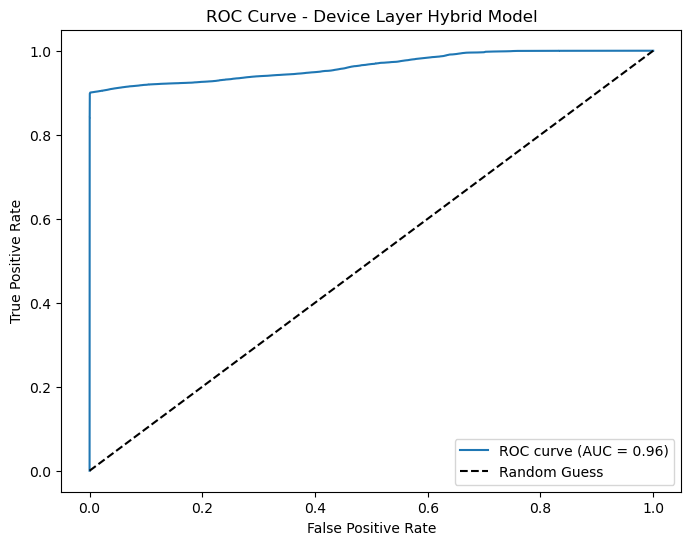

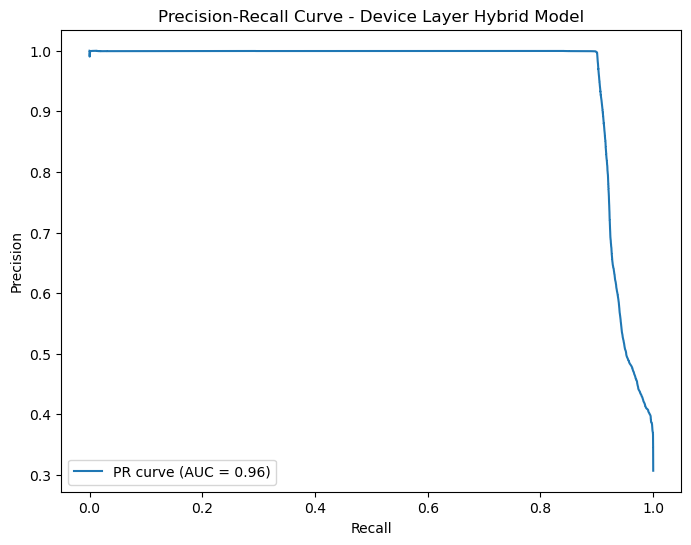

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
)

# Load the saved CSV with hybrid model predictions
df = pd.read_csv("Device_Layer_Hybrid_Predictions.csv")

# Check the first few rows to verify columns (assumes columns "Binary_Label" and "Device_Anomaly_Confidence")
print("Data Sample:")
print(df.head())

# Ensure that Binary_Label is available.
# If not, you can create it from the original "Label" column as:
# df["Binary_Label"] = df["Label"].apply(lambda x: 0 if x.lower() == "benign" else 1)

# Assuming:
# - "Binary_Label" contains ground truth (0 for Normal, 1 for Attack)
# - "Hybrid_Device_Prediction" contains binary predictions from the fusion of IF and MLP
# - "Device_Anomaly_Confidence" contains a continuous score between 0 and 1

y_true = df["Binary_Label"]
y_pred = df["Hybrid_Device_Prediction"]
scores = df["Device_Anomaly_Confidence"]

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate Classification Report
report = classification_report(y_true, y_pred, target_names=["Normal", "Attack"])
print("\nClassification Report:")
print(report)

# ROC Curve and AUC (for the anomaly confidence scores)
fpr, tpr, thresholds = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Device Layer Hybrid Model")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve and AUC
precision, recall, pr_thresholds = precision_recall_curve(y_true, scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Device Layer Hybrid Model")
plt.legend(loc="lower left")
plt.show()

In [37]:
import pandas as pd

# Load the same CSV used for overall evaluation
df = pd.read_csv("Device_Layer_Hybrid_Predictions.csv")

# Filter to only infiltration samples
df_infil = df[df["Label"] == "Infilteration"]

# If your infiltration samples are mapped to 1 in Binary_Label, 
# then 'df_infil["Binary_Label"]' should be 1 for infiltration.
# 'Hybrid_Device_Prediction' is the final device-layer decision (0 = Normal, 1 = Attack)

total_infil = df_infil.shape[0]
detected_infil = df_infil[df_infil["Hybrid_Device_Prediction"] == 1].shape[0]

# Percentage of infiltration samples detected
if total_infil > 0:
    infiltration_detection_rate = (detected_infil / total_infil) * 100
else:
    infiltration_detection_rate = 0

print(f"Total Infiltration Samples: {total_infil}")
print(f"Infiltration Samples Detected: {detected_infil}")
print(f"Infiltration Detection Rate: {infiltration_detection_rate:.2f}%")

# Optional: compute infiltration-specific confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_true_infil = df_infil["Binary_Label"]
y_pred_infil = df_infil["Hybrid_Device_Prediction"]

cm_infil = confusion_matrix(y_true_infil, y_pred_infil)
report_infil = classification_report(y_true_infil, y_pred_infil, target_names=["Normal(Err?)", "Infiltration"])

print("\nInfiltration-Specific Confusion Matrix:")
print(cm_infil)
print("\nInfiltration-Specific Classification Report:")
print(report_infil)

Total Infiltration Samples: 68224
Infiltration Samples Detected: 46
Infiltration Detection Rate: 0.07%

Infiltration-Specific Confusion Matrix:
[[    0     0]
 [68178    46]]

Infiltration-Specific Classification Report:
              precision    recall  f1-score   support

Normal(Err?)       0.00      0.00      0.00         0
Infiltration       1.00      0.00      0.00     68224

    accuracy                           0.00     68224
   macro avg       0.50      0.00      0.00     68224
weighted avg       1.00      0.00      0.00     68224



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dataset loaded successfully. Shape: (2270317, 88)
Device Layer Features: ['Dst Port', 'Fwd Pkt Len Max', 'Bwd Pkt Len Min', 'Pkt Len Var', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow Duration', 'Flow IAT Mean', 'Flow IAT Std', 'Idle Max', 'Idle Mean', 'Active Min', 'Active Max', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Header Len', 'Bwd Header Len', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Hour_sin', 'Hour_cos']
Training set size (MLP): (1816253, 22) (1816253,)
Testing set size (MLP): (454064, 22) (454064,)

Training Isolation Forest on Device Layer features...
Isolation Forest training completed.

Training MLP model for Device Layer (Supervised)...

Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28252/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.9514 - loss: 0.1782
Epoch 1: val_accuracy improved from -inf to 0.96707, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_best.keras
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 12s 407us/step - accuracy: 0.9515 - loss: 0.1780 - val_accuracy: 0.9671 - val_loss: 0.1054
Epoch 2/15
28242/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.9660 - loss: 0.1116
Epoch 2: val_accuracy improved from 0.96707 to 0.96746, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_best.keras
28379/28379 ━━━━━━━━━━━━━━━━━━━━ 12s 405us/step - accuracy: 0.9660 - loss: 0.1116 - val_accuracy: 0.9675 - val_loss: 0.1040
Epoch 3/15
28231/28379 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.9664 - loss: 0.1093
Epoch 3: val_accuracy improved from 0.96746 to 0.96762, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_best.keras
28379/2

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report (Hybrid):
                         precision    recall  f1-score   support

                Benign       0.69      1.00      0.82    314734
      Brute Force -Web       0.00      0.00      0.00        72
      Brute Force -XSS       0.00      0.00      0.00        30
DDoS attacks-LOIC-HTTP       0.23      0.00      0.00    115235
 DoS attacks-GoldenEye       0.00      0.00      0.00      8291
 DoS attacks-Slowloris       0.00      0.00      0.00      2057
         Infilteration       0.00      0.00      0.00     13645

              accuracy                           0.69    454064
             macro avg       0.13      0.14      0.12    454064
          weighted avg       0.54      0.69      0.57    454064


Confusion Matrix (Hybrid):
 [[314530      1      0     88     39     76      0]
 [    72      0      0      0      0      0      0]
 [    30      0      0      0      0      0      0]
 [115167      0      0     28     22     18      0]
 [  8289      0      0

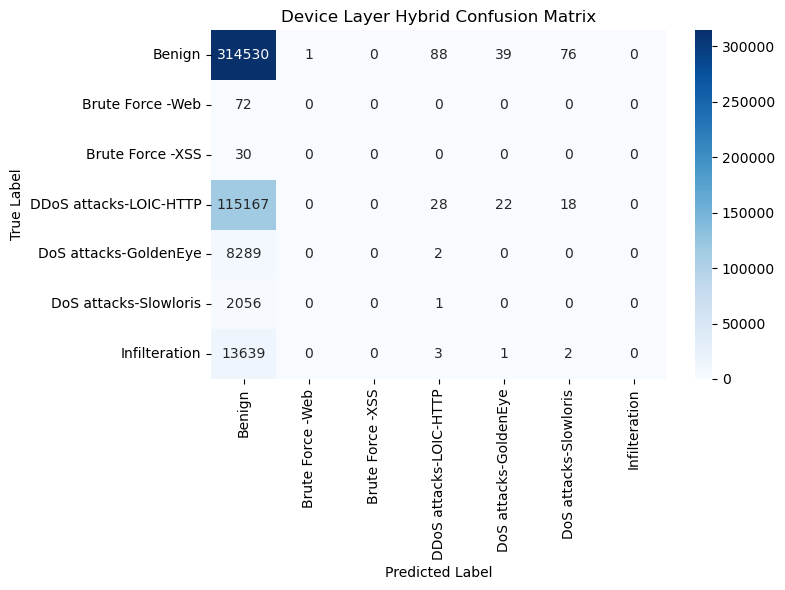

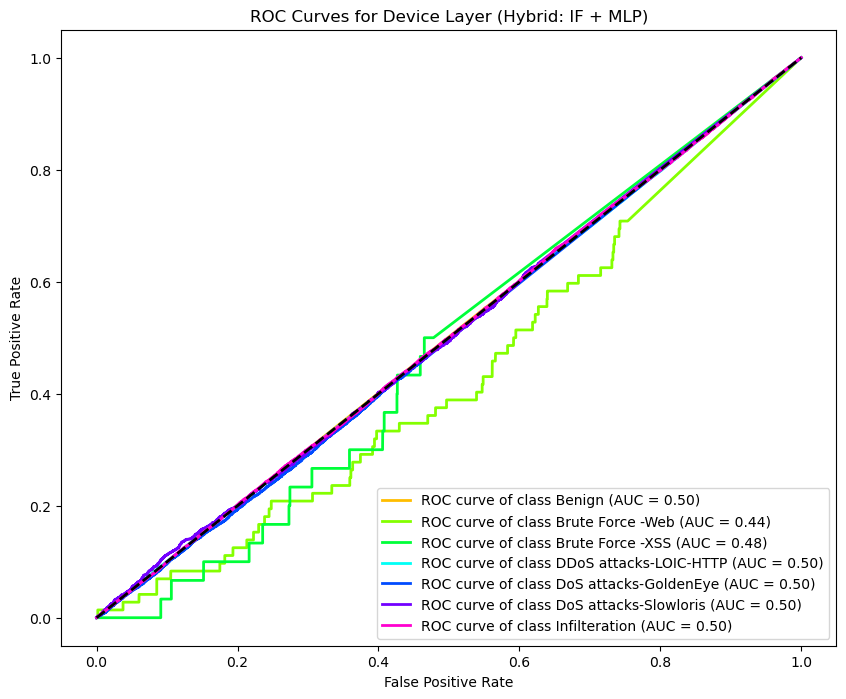

NameError: name 'combined_confidence_test' is not defined

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve,
                             auc, accuracy_score)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === Step 0: Setup ===
tf.random.set_seed(42)
np.random.seed(42)

DEVICE_MODEL_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device"
os.makedirs(DEVICE_MODEL_DIR, exist_ok=True)

DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

# === Step 1: Load Dataset ===
df = pd.read_csv(DATA_PATH)
print("Dataset loaded successfully. Shape:", df.shape)

# === Step 2: Define Device Layer Features ===
# These are chosen to capture endpoint-level anomalies, infiltration signals, idle/active times, etc.
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]
print("Device Layer Features:", device_features)

# === Step 3: Prepare Data ===
X = df[device_features].values
y = df["Label"].values  # Multi-class labels

# Encode labels (multi-class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Step 4: Train-Test Split for MLP (Supervised) ===
# We'll do an 80/20 split for the supervised portion
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2, random_state=42, stratify=y_encoded
)
print("Training set size (MLP):", X_train.shape, y_train.shape)
print("Testing set size (MLP):", X_test.shape, y_test.shape)

# === Step 5: Isolation Forest (Unsupervised) on entire dataset ===
# We train IF on the entire dataset (X_scaled) to detect anomalies globally.
print("\nTraining Isolation Forest on Device Layer features...")
isolation_forest = IsolationForest(
    n_estimators=300,
    max_samples="auto",
    contamination="auto",  # Let model estimate fraction of outliers
    random_state=42,
    n_jobs=-1
)
isolation_forest.fit(X_scaled)
print("Isolation Forest training completed.")

# Generate IF anomaly scores for entire dataset
IF_scores_raw = isolation_forest.decision_function(X_scaled)
# Convert raw decision_function to [0,1] range, where higher = more anomalous
# We'll invert it so that higher = more likely to be anomaly
IF_scores_min = IF_scores_raw.min()
IF_scores_max = IF_scores_raw.max()
IF_confidence_all = (IF_scores_max - IF_scores_raw) / (IF_scores_max - IF_scores_min)

# For the train/test subset
IF_confidence_train = IF_confidence_all[:X_train.shape[0]]
IF_confidence_test = IF_confidence_all[X_train.shape[0]:]

# === Step 6: Build MLP Classifier (Supervised) ===
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

best_mlp_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_mlp_best.keras")
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint(best_mlp_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

print("\nTraining MLP model for Device Layer (Supervised)...\n")
history = mlp_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint]
)

test_loss, test_acc = mlp_model.evaluate(X_test, y_test)
print(f"\nFinal MLP Test Accuracy: {test_acc:.4f}")

# Load best MLP model if checkpoint improved
if os.path.exists(best_mlp_path):
    print("Loading best MLP model from checkpoint...")
    mlp_best = tf.keras.models.load_model(best_mlp_path)
    best_loss, best_acc = mlp_best.evaluate(X_test, y_test)
    print(f"Device Layer MLP Model Accuracy (best checkpoint): {best_acc:.4f}")
else:
    mlp_best = mlp_model

# === Step 7: Generate Final Device Anomaly Scores (IF + MLP) ===
# MLP probabilities for entire dataset
y_prob_all = mlp_best.predict(X_scaled)
# We define a weighting
weight_IF = 0.5
weight_MLP = 0.5

# Option 1: single “attack confidence” for each sample, or
# Option 2: produce multi-class distribution from MLP, then incorporate IF as an anomaly factor
# We'll do a simple approach: "final_confidence" = average of (IF anomaly) and (1 - p_benign).
# For multi-class predictions, we can combine them in a different way.

# For demonstration, let's do multi-class final approach:
# Step 1: MLP picks the top class with highest probability
# Step 2: We define a single anomaly confidence = IF_confidence + (1 - p_benign), normalized

benign_index = list(label_encoder.classes_).index("Benign") if "Benign" in label_encoder.classes_ else 0
p_benign_all = y_prob_all[:, benign_index]
anomaly_score_all = 1.0 - p_benign_all  # how likely is it an attack
combined_confidence_all = weight_IF * IF_confidence_all + weight_MLP * anomaly_score_all

# For classification, let's do:
# - If "combined_confidence" is high, we trust the MLP's predicted class
# - If "combined_confidence" is low, we trust benign
# We'll keep it simple and just pick MLP's top class. We'll store "combined_confidence" as a single numeric measure.

y_pred_all = np.argmax(y_prob_all, axis=1)
final_confidence_all = np.max(y_prob_all, axis=1)  # MLP max prob
# We'll store the combined_confidence_all separately for reference

# Let's now evaluate on the test subset specifically
y_pred_test = y_pred_all[X_train.shape[0]:]
final_confidence_test = final_confidence_all[X_train.shape[0]:]

# === Step 8: Evaluate Hybrid Approach on Test Set ===
acc_test = accuracy_score(y_test, y_pred_test)
print(f"\nHybrid (IF + MLP) Decision Accuracy (same top class as MLP, but IF used in anomaly score): {acc_test:.4f}")

# Classification report
report = classification_report(y_test, y_pred_test, target_names=label_encoder.classes_)
print("\nClassification Report (Hybrid):\n", report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Hybrid):\n", cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Device Layer Hybrid Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
cm_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_confusion_matrix.png")
plt.savefig(cm_path)
plt.show()

# === Step 9: ROC Curves (One-vs-Rest) for the Hybrid Classification ===
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))
y_pred_proba_test = y_prob_all[X_train.shape[0]:]  # MLP probabilities on test set
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = sns.color_palette("hsv", num_classes)
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Device Layer (Hybrid: IF + MLP)")
plt.legend(loc="lower right")
roc_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_roc.png")
plt.savefig(roc_path)
plt.show()

# === Step 10: Save final results to CSV ===
device_results_df = pd.DataFrame({
    "True_Label": y_test,
    "Predicted_Label": y_pred_test,
    "MLP_Confidence_Score": final_confidence_test,
    "IF_Confidence_Score": IF_confidence_test,
    "Combined_Confidence": combined_confidence_test
})
csv_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_results.csv")
device_results_df.to_csv(csv_path, index=False)
print(f"\nDevice Layer results saved to: {csv_path}")

print("\n=== Device Layer Hybrid Approach Completed ===")

2025-03-26 23:39:22,989 - INFO - Dataset loaded successfully. Shape: (2270317, 88)
2025-03-26 23:39:22,999 - INFO - Device Layer Features selected: Dst Port, Fwd Pkt Len Max, Bwd Pkt Len Min, Pkt Len Var, Fwd Pkt Len Std, Bwd Pkt Len Std, Flow Duration, Flow IAT Mean, Flow IAT Std, Idle Max, Idle Mean, Active Min, Active Max, Init Fwd Win Byts, Init Bwd Win Byts, Fwd Header Len, Bwd Header Len, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Hour_sin, Hour_cos
2025-03-26 23:39:23,824 - INFO - Features scaled successfully.
2025-03-26 23:39:24,007 - INFO - Benign Training set size: (1258932, 22)
2025-03-26 23:39:24,008 - INFO - Evaluation set size (full dataset): (2270317, 22)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           253 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 22)             │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3845/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.7156
Epoch 1: val_loss improved from inf to 0.37701, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:26,460 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 465us/step - loss: 0.7125 - val_loss: 0.3770
Epoch 2/50
3879/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.4815
Epoch 2: val_loss improved from 0.37701 to 0.36931, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:28,351 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step - loss: 0.4813 - val_loss: 0.3693
Epoch 3/50
3811/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.4644
Epoch 3: val_loss did not improve from 0.36931
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 463us/step - loss: 0.4642 - val_loss: 0.3710
Epoch 4/50
3850/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.4500
Epoch 4: val_loss improved from 0.36931 to 0.35676, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:32,017 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 455us/step - loss: 0.4499 - val_loss: 0.3568
Epoch 5/50
3933/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.4391
Epoch 5: val_loss improved from 0.35676 to 0.34573, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:33,864 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step - loss: 0.4391 - val_loss: 0.3457
Epoch 6/50
3890/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.4284
Epoch 6: val_loss improved from 0.34573 to 0.32641, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:35,670 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step - loss: 0.4283 - val_loss: 0.3264
Epoch 7/50
3856/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.4159
Epoch 7: val_loss improved from 0.32641 to 0.31695, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:37,441 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - loss: 0.4159 - val_loss: 0.3170
Epoch 8/50
3843/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.4208
Epoch 8: val_loss improved from 0.31695 to 0.30964, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:39,217 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - loss: 0.4206 - val_loss: 0.3096
Epoch 9/50
3899/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.4127
Epoch 9: val_loss improved from 0.30964 to 0.30096, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:40,960 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 437us/step - loss: 0.4126 - val_loss: 0.3010
Epoch 10/50
3847/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.3970
Epoch 10: val_loss improved from 0.30096 to 0.29501, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:42,737 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - loss: 0.3971 - val_loss: 0.2950
Epoch 11/50
3863/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.4049
Epoch 11: val_loss improved from 0.29501 to 0.29302, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:44,506 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 443us/step - loss: 0.4049 - val_loss: 0.2930
Epoch 12/50
3889/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 0.3736
Epoch 12: val_loss improved from 0.29302 to 0.28203, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:46,262 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step - loss: 0.3736 - val_loss: 0.2820
Epoch 13/50
3888/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.3725
Epoch 13: val_loss did not improve from 0.28203
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 437us/step - loss: 0.3726 - val_loss: 0.2823
Epoch 14/50
3896/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.3746
Epoch 14: val_loss improved from 0.28203 to 0.28041, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:49,756 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step - loss: 0.3745 - val_loss: 0.2804
Epoch 15/50
3832/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3694
Epoch 15: val_loss improved from 0.28041 to 0.27877, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:51,544 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step - loss: 0.3696 - val_loss: 0.2788
Epoch 16/50
3926/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.3703
Epoch 16: val_loss improved from 0.27877 to 0.27634, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:53,390 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 462us/step - loss: 0.3703 - val_loss: 0.2763
Epoch 17/50
3894/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.3600
Epoch 17: val_loss improved from 0.27634 to 0.27400, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:39:55,198 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step - loss: 0.3600 - val_loss: 0.2740
Epoch 18/50
3926/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.3631
Epoch 18: val_loss did not improve from 0.27400
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 432us/step - loss: 0.3631 - val_loss: 0.2793
Epoch 19/50
3836/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3542
Epoch 19: val_loss did not improve from 0.27400
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step - loss: 0.3542 - val_loss: 0.2785
Epoch 20/50
3916/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.3590
Epoch 20: val_loss did not improve from 0.27400
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 435us/step - loss: 0.3589 - val_loss: 0.2751
Epoch 21/50
3869/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.3541
Epoch 21: val_loss improved from 0.27400 to 0.27353, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:40:02,166 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step - loss: 0.3540 - val_loss: 0.2735
Epoch 22/50
3842/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.3668
Epoch 22: val_loss improved from 0.27353 to 0.27302, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_best.h5


2025-03-26 23:40:03,931 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 442us/step - loss: 0.3667 - val_loss: 0.2730
Epoch 23/50
3829/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3688
Epoch 23: val_loss did not improve from 0.27302
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 446us/step - loss: 0.3687 - val_loss: 0.2754
Epoch 24/50
3845/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.3555
Epoch 24: val_loss did not improve from 0.27302
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 440us/step - loss: 0.3555 - val_loss: 0.2783
Epoch 25/50
3836/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3584
Epoch 25: val_loss did not improve from 0.27302
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 441us/step - loss: 0.3583 - val_loss: 0.2809
Epoch 26/50
3800/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.3536
Epoch 26: val_loss did not improve from 0.27302
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 448us/step - loss: 0.3536 - val_loss: 0.2759
Epoch 27/50
3821/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.3568
Epoch 27: val_loss improved from 0.27302 to 0.27243, 

2025-03-26 23:40:12,792 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 446us/step - loss: 0.3567 - val_loss: 0.2724
Epoch 28/50
3830/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3696
Epoch 28: val_loss did not improve from 0.27243
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - loss: 0.3695 - val_loss: 0.2772
Epoch 29/50
3924/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.3674
Epoch 29: val_loss did not improve from 0.27243
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 433us/step - loss: 0.3674 - val_loss: 0.2837
Epoch 30/50
3823/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.3593
Epoch 30: val_loss did not improve from 0.27243
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 441us/step - loss: 0.3595 - val_loss: 0.2808
Epoch 31/50
3862/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.3725
Epoch 31: val_loss did not improve from 0.27243
3935/3935 ━━━━━━━━━━━━━━━━━━━━ 2s 438us/step - loss: 0.3724 - val_loss: 0.2797
Epoch 32/50
3894/3935 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.3551
Epoch 32: val_loss did not improve from 0.27243
3935/

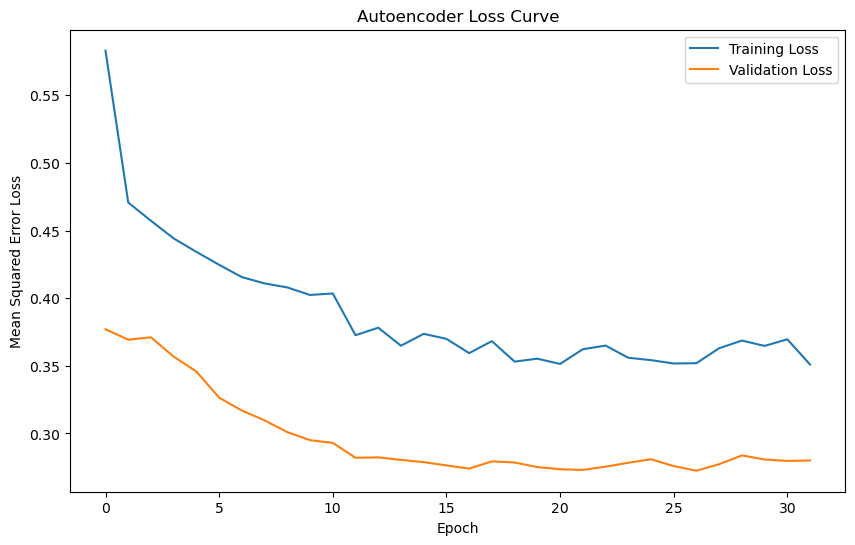

70948/70948 ━━━━━━━━━━━━━━━━━━━━ 12s 174us/step


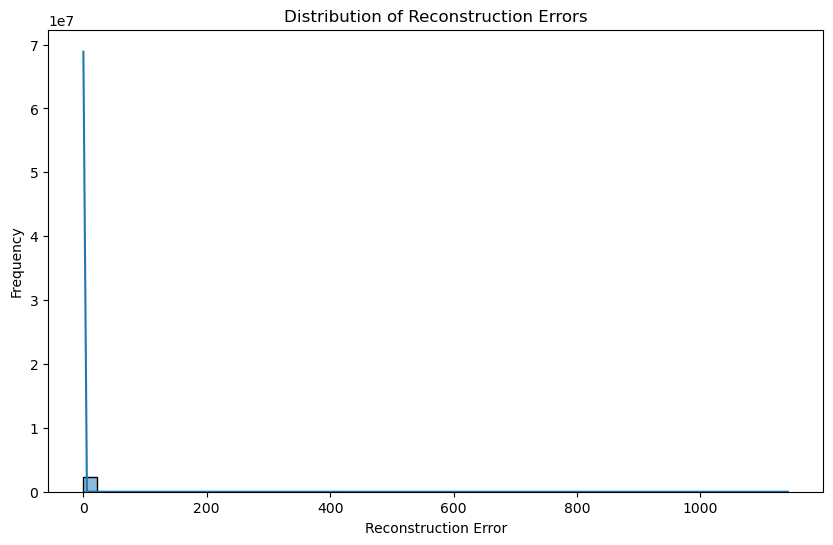

Selected Reconstruction Error Threshold: 0.8059
Autoencoder-based Binary Classification Accuracy: 0.6666

Classification Report (Autoencoder):
              precision    recall  f1-score   support

      Benign       0.69      0.95      0.80   1573665
      Attack       0.19      0.03      0.05    696652

    accuracy                           0.67   2270317
   macro avg       0.44      0.49      0.42   2270317
weighted avg       0.53      0.67      0.57   2270317


Confusion Matrix (Autoencoder):
[[1494981   78684]
 [ 678294   18358]]


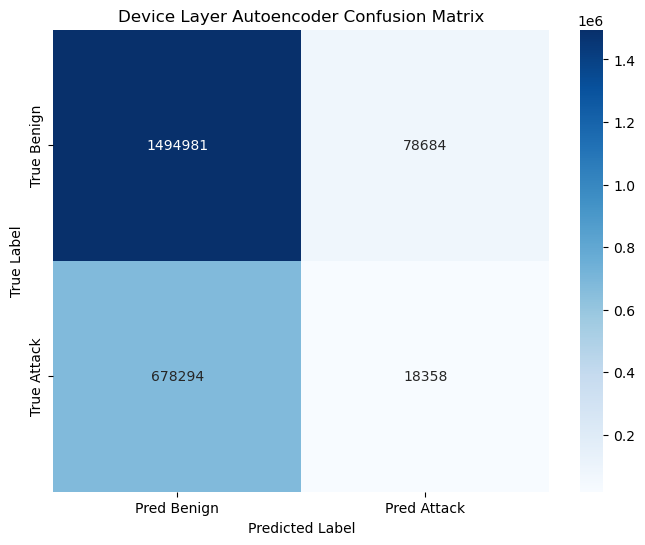


Device Layer Autoencoder results saved to: /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_autoencoder_results.csv


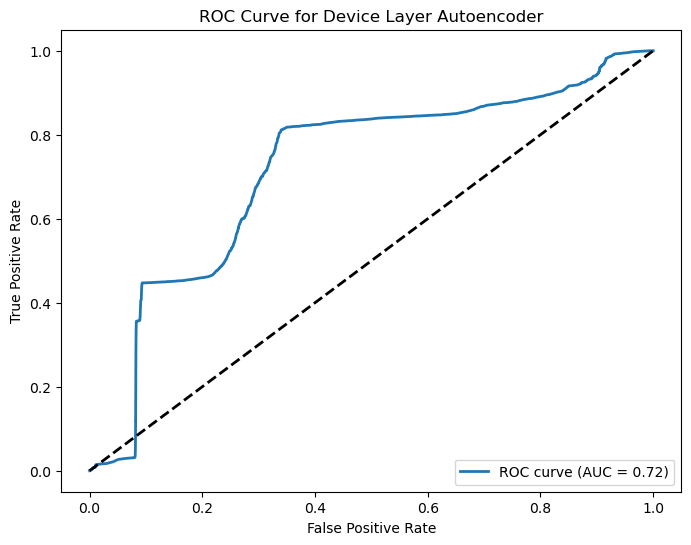


=== Device Layer Autoencoder Implementation Completed ===


In [7]:
# Device Layer - Autoencoder for Infiltration and Endpoint Anomaly Detection
# This model learns the normal (benign) behavior of endpoint network flows.
# Samples with high reconstruction errors are flagged as anomalies.
# Citations: [1] Chalapathy & Chawla, 2019; [2] Hawkins et al., 2002

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             auc, accuracy_score)
import joblib
import logging

# === Setup Logging and Directory ===
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
DEVICE_MODEL_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device"
os.makedirs(DEVICE_MODEL_DIR, exist_ok=True)

# === Step 1: Load Dataset ===
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(DATA_PATH)
logging.info(f"Dataset loaded successfully. Shape: {df.shape}")

# === Step 2: Define Device Layer Features ===
# We use a comprehensive set of features that capture endpoint behavior, variability, and timing.
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]
logging.info("Device Layer Features selected: " + ", ".join(device_features))

# === Step 3: Preprocess Data ===
# Convert features to numeric and scale them.
X = df[device_features].values
# For anomaly detection, we focus on binary labels: Benign vs. Attack.
# Map "Benign" to 0 and all other labels to 1.
df["Binary_Label"] = df["Label"].apply(lambda x: 0 if x.strip().lower() == "benign" else 1)
y = df["Binary_Label"].values

# Encode any categorical features if necessary (e.g., Dst Port or Protocol) – here we assume numeric conversion.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# === Step 4: Train-Test Split ===
# For unsupervised training, we train the autoencoder on benign data only.
X_benign = X_scaled[y == 0]
# However, for evaluation we want the full test set.
X_train, X_test, y_train, y_test = train_test_split(
    X_benign, y[y == 0], test_size=0.2, random_state=42
)
# For evaluation, we also keep the entire dataset.
logging.info(f"Benign Training set size: {X_train.shape}")
logging.info(f"Evaluation set size (full dataset): {X_scaled.shape}")

# === Step 5: Build the Autoencoder Model ===
# We build a feed-forward autoencoder that compresses the device features and reconstructs them.
input_dim = X_scaled.shape[1]
encoding_dim = int(input_dim / 2)  # Adjust compression as needed

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dropout(0.2)(decoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")
autoencoder.summary()

# === Step 6: Train the Autoencoder ===
# We train on benign data only so that it learns the typical patterns.
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_best.h5")
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

# Plot training history (loss curve)
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")
plt.legend()
loss_curve_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_loss_curve.png")
plt.savefig(loss_curve_path)
plt.show()

# === Step 7: Evaluate the Autoencoder ===
# Compute reconstruction error for all samples in the full dataset
reconstructions = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - reconstructions), axis=1)

# Plot histogram of reconstruction errors
plt.figure(figsize=(10,6))
sns.histplot(reconstruction_errors, bins=50, kde=True)
plt.title("Distribution of Reconstruction Errors")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
error_hist_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_error_hist.png")
plt.savefig(error_hist_path)
plt.show()

# === Step 8: Define Anomaly Threshold ===
# Set the threshold based on the reconstruction error distribution on benign training data
threshold = np.percentile(reconstruction_errors[y == 0], 95)  # 95th percentile [1]
print(f"Selected Reconstruction Error Threshold: {threshold:.4f}")

# Classify samples: Error > threshold is an anomaly (attack), else benign.
y_pred_auto = (reconstruction_errors > threshold).astype(int)

# === Step 9: Evaluate Autoencoder Performance ===
# Using the full dataset ground truth
acc_auto = accuracy_score(y, y_pred_auto)
print(f"Autoencoder-based Binary Classification Accuracy: {acc_auto:.4f}")

print("\nClassification Report (Autoencoder):")
print(classification_report(y, y_pred_auto, target_names=["Benign", "Attack"]))

cm_auto = confusion_matrix(y, y_pred_auto)
print("\nConfusion Matrix (Autoencoder):")
print(cm_auto)

plt.figure(figsize=(8,6))
sns.heatmap(cm_auto, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Pred Benign", "Pred Attack"],
            yticklabels=["True Benign", "True Attack"])
plt.title("Device Layer Autoencoder Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
cm_auto_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_confusion_matrix.png")
plt.savefig(cm_auto_path)
plt.show()

# === Step 10: Save the Autoencoder Model and Results ===
joblib.dump(autoencoder, os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_model.pkl"))
results_df = pd.DataFrame({
    "True_Label": y,
    "Reconstruction_Error": reconstruction_errors,
    "Predicted_Label": y_pred_auto
})
results_csv_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_results.csv")
results_df.to_csv(results_csv_path, index=False)
print(f"\nDevice Layer Autoencoder results saved to: {results_csv_path}")

# === Step 11: ROC Curves (One-vs-Rest) for Binary Classification ===
# Binarize ground truth labels (0: benign, 1: attack)
fpr, tpr, roc_auc = roc_curve(y, reconstruction_errors), None, None
# For ROC, we use reconstruction error as a continuous score (higher = more likely attack)
fpr, tpr, _ = roc_curve(y, reconstruction_errors)
roc_auc_value = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Device Layer Autoencoder")
plt.legend(loc="lower right")
roc_curve_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_roc.png")
plt.savefig(roc_curve_path)
plt.show()

print("\n=== Device Layer Autoencoder Implementation Completed ===")

2025-03-27 12:08:29,288 - INFO - Dataset loaded successfully. Shape: (2270317, 88)
2025-03-27 12:08:29,289 - INFO - Device Layer Features selected: Dst Port, Fwd Pkt Len Max, Bwd Pkt Len Min, Pkt Len Var, Fwd Pkt Len Std, Bwd Pkt Len Std, Flow Duration, Flow IAT Mean, Flow IAT Std, Idle Max, Idle Mean, Active Min, Active Max, Init Fwd Win Byts, Init Bwd Win Byts, Fwd Header Len, Bwd Header Len, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Hour_sin, Hour_cos
2025-03-27 12:08:29,916 - INFO - Features scaled successfully.
2025-03-27 12:08:30,638 - INFO - Benign sequences shape: (1573656, 10, 22)
2025-03-27 12:08:32,682 - INFO - All sequences shape: (2270308, 10, 22)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 22)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10, 64)         │        22,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 22)         │         7,656 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,848 (218.16 KB)

 Trainable params: 55,848 (218.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7681
Epoch 1: val_loss improved from inf to 0.52013, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:10:39,205 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 124s 25ms/step - loss: 0.7680 - val_loss: 0.5201
Epoch 2/50
4916/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4938
Epoch 2: val_loss improved from 0.52013 to 0.43357, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:12:56,633 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 137s 28ms/step - loss: 0.4938 - val_loss: 0.4336
Epoch 3/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4371
Epoch 3: val_loss improved from 0.43357 to 0.35712, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:14:58,456 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 122s 25ms/step - loss: 0.4371 - val_loss: 0.3571
Epoch 4/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4106
Epoch 4: val_loss improved from 0.35712 to 0.35559, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:17:14,302 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 136s 28ms/step - loss: 0.4106 - val_loss: 0.3556
Epoch 5/50
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3721
Epoch 5: val_loss improved from 0.35559 to 0.32953, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:19:23,089 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 129s 26ms/step - loss: 0.3721 - val_loss: 0.3295
Epoch 6/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3605
Epoch 6: val_loss improved from 0.32953 to 0.29187, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:21:29,291 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 126s 26ms/step - loss: 0.3605 - val_loss: 0.2919
Epoch 7/50
4916/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3417
Epoch 7: val_loss improved from 0.29187 to 0.28828, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:23:37,236 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 128s 26ms/step - loss: 0.3417 - val_loss: 0.2883
Epoch 8/50
4916/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3621
Epoch 8: val_loss improved from 0.28828 to 0.27896, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:25:39,037 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 122s 25ms/step - loss: 0.3620 - val_loss: 0.2790
Epoch 9/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3528
Epoch 9: val_loss improved from 0.27896 to 0.25664, saving model to /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_lstm_autoencoder_best.h5


2025-03-27 12:27:46,282 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


4918/4918 ━━━━━━━━━━━━━━━━━━━━ 127s 26ms/step - loss: 0.3528 - val_loss: 0.2566
Epoch 10/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3420
Epoch 10: val_loss did not improve from 0.25664
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 127s 26ms/step - loss: 0.3420 - val_loss: 0.2578
Epoch 11/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3172
Epoch 11: val_loss did not improve from 0.25664
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 119s 24ms/step - loss: 0.3172 - val_loss: 0.2612
Epoch 12/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3358
Epoch 12: val_loss did not improve from 0.25664
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 122s 25ms/step - loss: 0.3358 - val_loss: 0.5287
Epoch 13/50
4916/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5360
Epoch 13: val_loss did not improve from 0.25664
4918/4918 ━━━━━━━━━━━━━━━━━━━━ 127s 26ms/step - loss: 0.5360 - val_loss: 0.3856
Epoch 14/50
4917/4918 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4127
Epoch 14: val_loss did not improve from 0.25664
4918/

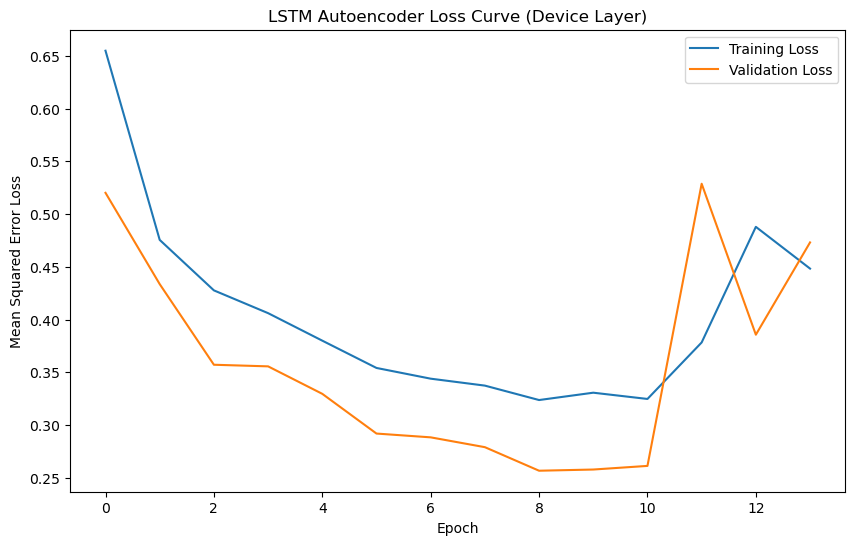

70948/70948 ━━━━━━━━━━━━━━━━━━━━ 96s 1ms/step


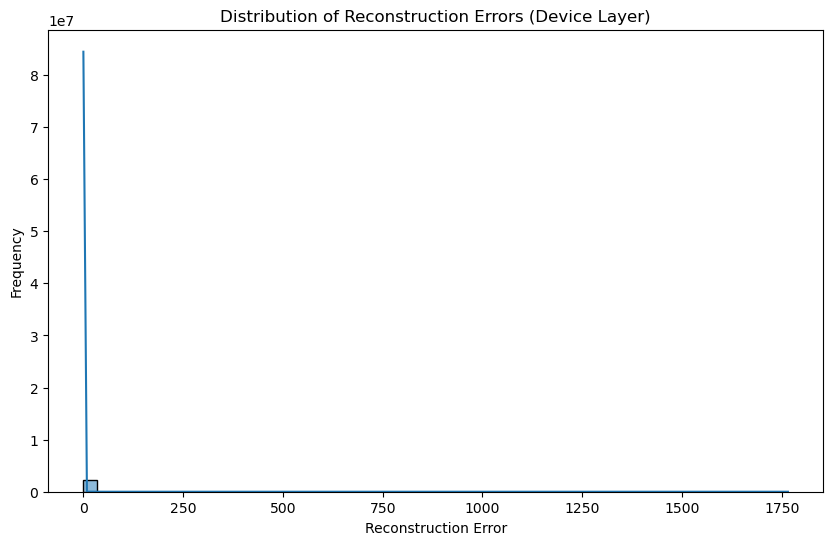

49177/49177 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step


2025-03-27 12:41:55,333 - INFO - Selected Reconstruction Error Threshold: 0.5956


Selected Reconstruction Error Threshold: 0.5956
Autoencoder-based Binary Classification Accuracy: 0.6708

Classification Report (Autoencoder):
              precision    recall  f1-score   support

      Benign       0.69      0.95      0.80   1573656
      Attack       0.26      0.04      0.07    696652

    accuracy                           0.67   2270308
   macro avg       0.48      0.50      0.43   2270308
weighted avg       0.56      0.67      0.58   2270308


Confusion Matrix (Autoencoder):
[[1494988   78668]
 [ 668624   28028]]


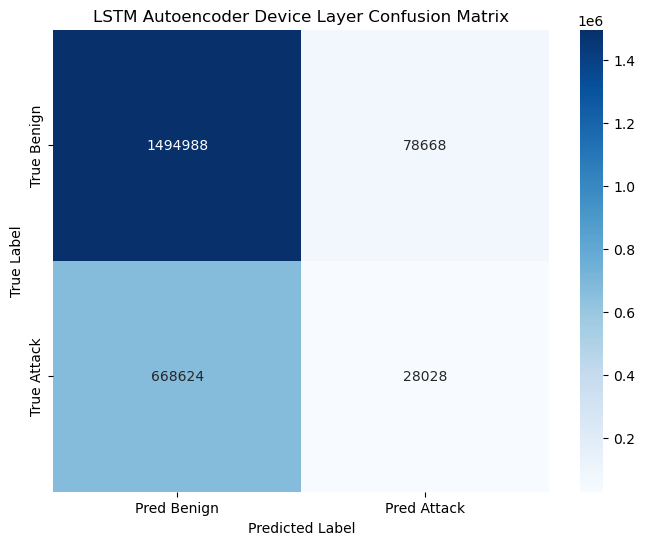

2025-03-27 12:41:59,591 - INFO - Device Layer LSTM Autoencoder model and results saved successfully.


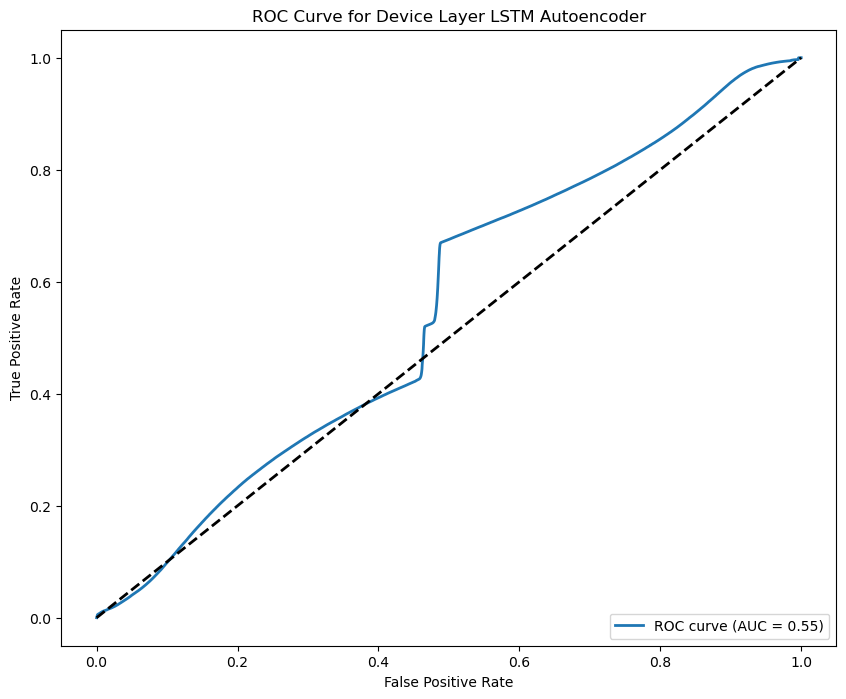


=== Device Layer LSTM Autoencoder Implementation Completed ===


In [2]:
"""
Device Layer – LSTM Autoencoder for Robust Infiltration Detection
===================================================================

Overview:
---------
This implementation uses an LSTM Autoencoder to learn the temporal dynamics 
of benign endpoint behavior from device-layer features. The model is trained 
on benign (normal) data only so that any deviation (i.e., infiltration or other 
endpoint anomalies) yields a higher reconstruction error. A threshold is then 
determined (using the 95th percentile of benign errors) to classify samples as 
anomalous.

Key Benefits:
-------------
- **Temporal Modeling:** LSTM layers capture sequential dependencies in the data [1].
- **Robust Anomaly Detection:** High reconstruction error indicates samples that deviate 
  from learned benign behavior [2].
- **Adaptive Thresholding:** The threshold is set based on benign training data distribution,
  with potential for dynamic adjustment in a real-time system [3].

References:
-----------
[1] Hochreiter, S. and Schmidhuber, J., “Long Short-Term Memory,” Neural Computation, 1997.
[2] Chalapathy, R. and Chawla, S., “Deep Learning for Anomaly Detection: A Survey,” arXiv, 2019.
[3] Gama, J. et al., “A Survey on Concept Drift Adaptation,” ACM Computing Surveys, 2014.
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
import joblib
import logging

# --- Setup Logging and Directory ---
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
DEVICE_MODEL_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device"
os.makedirs(DEVICE_MODEL_DIR, exist_ok=True)

# --- Step 1: Load the Dataset ---
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
df = pd.read_csv(DATA_PATH)
logging.info(f"Dataset loaded successfully. Shape: {df.shape}")

# --- Step 2: Define Device Layer Features ---
# These features capture endpoint behavior including packet variability, flow timings,
# idle/active statistics, TCP window sizes, and cyclical time aspects.
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]
logging.info("Device Layer Features selected: " + ", ".join(device_features))

# --- Step 3: Preprocess Data ---
# Convert the selected features to a numpy array and scale them.
X = df[device_features].values
# For training the autoencoder, we use only benign data.
# Here, we assume "Benign" (case-insensitive) represents normal behavior.
df["Binary_Label"] = df["Label"].apply(lambda x: 0 if x.strip().lower() == "benign" else 1)
y = df["Binary_Label"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Features scaled successfully.")

# --- Step 4: Sequence Formation for LSTM Autoencoder ---
# For LSTM autoencoders, we need to reshape the data into sequences.
# We assume the dataset is time-ordered. The sequence_length can be tuned.
sequence_length = 10  # Adjust as necessary to capture temporal dependencies
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

# We will train the autoencoder on benign (normal) samples only.
benign_data = X_scaled[y == 0]
benign_sequences = create_sequences(benign_data, sequence_length)
logging.info(f"Benign sequences shape: {benign_sequences.shape}")

# For evaluation, we prepare sequences for the full dataset.
all_sequences = create_sequences(X_scaled, sequence_length)
# For binary labels, we align the label with the last item in each sequence (heuristic)
all_labels = y[sequence_length - 1:]
logging.info(f"All sequences shape: {all_sequences.shape}")

# --- Step 5: Build the LSTM Autoencoder Model ---
input_shape = (sequence_length, X_scaled.shape[1])
latent_dim = 16  # Bottleneck dimension; adjust based on experimentation

inputs = Input(shape=input_shape)
# Encoder
encoded = LSTM(64, activation='relu', return_sequences=True)(inputs)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(latent_dim, activation='relu')(encoded)
# Decoder: repeat the bottleneck vector and reconstruct sequence
decoded = RepeatVector(sequence_length)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = LSTM(X_scaled.shape[1], activation='linear', return_sequences=True)(decoded)

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()  # Print model architecture

# --- Step 6: Train the Autoencoder on Benign Data Only ---
autoencoder_checkpoint = os.path.join(DEVICE_MODEL_DIR, "device_layer_lstm_autoencoder_best.h5")
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(autoencoder_checkpoint, monitor='val_loss', save_best_only=True, verbose=1)

history = autoencoder.fit(
    benign_sequences, benign_sequences,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)

# Plot training history (loss curves)
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")
plt.title("LSTM Autoencoder Loss Curve (Device Layer)")
plt.legend()
loss_plot_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_lstm_autoencoder_loss_curve.png")
plt.savefig(loss_plot_path)
plt.show()

# --- Step 7: Evaluate the Autoencoder ---
# Compute reconstruction errors for all sequences in the evaluation set.
reconstructions = autoencoder.predict(all_sequences)
# Calculate reconstruction error per sequence (mean squared error)
reconstruction_errors = np.mean(np.square(all_sequences - reconstructions), axis=(1,2))

# Plot the distribution of reconstruction errors
plt.figure(figsize=(10,6))
sns.histplot(reconstruction_errors, bins=50, kde=True)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors (Device Layer)")
error_hist_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_lstm_autoencoder_error_hist.png")
plt.savefig(error_hist_path)
plt.show()

# --- Step 8: Determine Anomaly Threshold ---
# Use benign data reconstruction errors to set a threshold (e.g., 95th percentile)
# Note: We use benign sequences only (from the training benign data)
benign_reconstructions = autoencoder.predict(benign_sequences)
benign_errors = np.mean(np.square(benign_sequences - benign_reconstructions), axis=(1,2))
threshold = np.percentile(benign_errors, 95)
print(f"Selected Reconstruction Error Threshold: {threshold:.4f}")
logging.info(f"Selected Reconstruction Error Threshold: {threshold:.4f}")

# Classify each sequence in the evaluation set: error > threshold => anomaly
y_pred_auto = (reconstruction_errors > threshold).astype(int)

# --- Step 9: Evaluate Autoencoder Performance ---
# For evaluation, align labels: all_labels represent binary labels (0: Benign, 1: Attack)
accuracy_auto = accuracy_score(all_labels, y_pred_auto)
print(f"Autoencoder-based Binary Classification Accuracy: {accuracy_auto:.4f}")

print("\nClassification Report (Autoencoder):")
report_auto = classification_report(all_labels, y_pred_auto, target_names=["Benign", "Attack"])
print(report_auto)

cm_auto = confusion_matrix(all_labels, y_pred_auto)
print("\nConfusion Matrix (Autoencoder):")
print(cm_auto)

plt.figure(figsize=(8,6))
sns.heatmap(cm_auto, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Benign", "Pred Attack"],
            yticklabels=["True Benign", "True Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LSTM Autoencoder Device Layer Confusion Matrix")
cm_plot_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_lstm_autoencoder_confusion_matrix.png")
plt.savefig(cm_plot_path)
plt.show()

# --- Step 10: Save Model and Results ---
# Save the trained autoencoder model and the evaluation results to CSV for further analysis.
autoencoder.save(os.path.join(DEVICE_MODEL_DIR, "device_layer_lstm_autoencoder_model.keras"))
joblib.dump(scaler, os.path.join(DEVICE_MODEL_DIR, "device_layer_scaler.pkl"))

results_df = pd.DataFrame({
    "Reconstruction_Error": reconstruction_errors,
    "Predicted_Label": y_pred_auto,
    "True_Label": all_labels
})
results_csv_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_lstm_autoencoder_results.csv")
results_df.to_csv(results_csv_path, index=False)
logging.info("Device Layer LSTM Autoencoder model and results saved successfully.")

# --- Step 11: ROC Curve for Binary Classification ---
# For ROC, we use the reconstruction error as a continuous score (higher = more anomalous).
fpr, tpr, thresholds = roc_curve(all_labels, reconstruction_errors)
roc_auc_value = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Device Layer LSTM Autoencoder")
plt.legend(loc="lower right")
roc_curve_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_lstm_autoencoder_roc_curve.png")
plt.savefig(roc_curve_path)
plt.show()

print("\n=== Device Layer LSTM Autoencoder Implementation Completed ===")

In [ ]:
# Hybrid Device Layer Implementation: LSTM Autoencoder + MLP Classifier Fusion
# This code trains an LSTM autoencoder (unsupervised) on benign endpoint sequences,
# an MLP classifier (supervised) on binary labels (Benign vs. Attack),
# and then fuses their outputs to produce a final anomaly confidence score.
# A threshold (default 0.5) is applied to the fused score to yield binary predictions.
#
# References:
# [1] Chalapathy, R. & Chawla, S. (2019). Deep Learning for Anomaly Detection: A Survey. arXiv:1901.03407.
# [2] Hawkins, S. et al. (2002). Outlier Detection Using Replicator Neural Networks. ICDM.
# [3] Dietterich, T. G. (2000). Ensemble Methods in Machine Learning. LNCS 1857.
# [4] Lundberg, S.M. & Lee, S.-I. (2017). A Unified Approach to Interpreting Model Predictions. NIPS.
#
# Adjust hyperparameters as needed for your operational requirements.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, RepeatVector
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import gc

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define directories and paths
DEVICE_MODEL_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device"
os.makedirs(DEVICE_MODEL_DIR, exist_ok=True)
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

# === Step 1: Load the dataset ===
df = pd.read_csv(DATA_PATH)
print("Dataset loaded successfully. Shape:", df.shape)

# === Step 2: Define Device Layer Features ===
# These features capture endpoint-specific behaviors, such as packet variability, session duration, 
# inter-arrival times, TCP window sizes, and cyclical time components – key to detecting infiltration and host anomalies.
device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]
print("Device Layer Features:", device_features)

# === Step 3: Data Preprocessing ===
# Create binary labels: 0 for benign, 1 for any attack
df["Binary_Label"] = np.where(df["Label"].str.lower() == "benign", 0, 1)
y_binary = df["Binary_Label"].values

# Extract features and convert to numpy array
X = df[device_features].values

# Scale features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled successfully.")

# === Step 4: Prepare Sequences for LSTM Autoencoder ===
# We use a sliding window approach to generate sequences (of length = 10) for the autoencoder.
sequence_length = 10  
num_samples = X_scaled.shape[0] - sequence_length + 1
X_seq = np.array([X_scaled[i:i+sequence_length] for i in range(num_samples)])
print("Sequence shape for Autoencoder:", X_seq.shape)

# For unsupervised training, we use only benign sequences
binary_seq = y_binary[sequence_length-1:]
benign_indices = np.where(binary_seq == 0)[0]
X_seq_benign = X_seq[benign_indices]
print("Benign sequence shape for Autoencoder training:", X_seq_benign.shape)

# --- Optionally split benign sequences for training/validation
X_train_ae, X_val_ae = train_test_split(X_seq_benign, test_size=0.2, random_state=42)
print("Autoencoder Training set shape:", X_train_ae.shape)
print("Autoencoder Validation set shape:", X_val_ae.shape)

# === Step 5: Build and Train the LSTM Autoencoder ===
input_seq = Input(shape=(sequence_length, X_scaled.shape[1]))
encoder = LSTM(64, return_sequences=True)(input_seq)
encoder = Dropout(0.2)(encoder)
encoder = LSTM(32)(encoder)
bottleneck = RepeatVector(sequence_length)(encoder)
decoder = LSTM(32, return_sequences=True)(bottleneck)
decoder = Dropout(0.2)(decoder)
decoder = LSTM(64, return_sequences=True)(decoder)
output_seq = Dense(X_scaled.shape[1])(decoder)

autoencoder = Model(input_seq, output_seq)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

# Define callbacks for autoencoder training
ae_checkpoint_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_best.keras")
early_stop_ae = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_ae = ModelCheckpoint(ae_checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)

history_ae = autoencoder.fit(
    X_train_ae, X_train_ae,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_ae, X_val_ae),
    callbacks=[early_stop_ae, checkpoint_ae],
    verbose=2
)
print("Autoencoder training completed.")

# --- Step 6: Compute Autoencoder Anomaly Scores ---
# Apply autoencoder to all sequences to get reconstructions
reconstructed = autoencoder.predict(X_seq)
# Calculate reconstruction error (mean squared error per sequence)
reconstruction_error = np.mean(np.power(X_seq - reconstructed, 2), axis=(1,2))
print("Reconstruction error computed.")

# Normalize error scores to [0,1] where higher score indicates a higher anomaly likelihood
error_min, error_max = reconstruction_error.min(), reconstruction_error.max()
ae_confidence_all = (reconstruction_error - error_min) / (error_max - error_min)

# --- Step 7: Train the MLP Classifier (Supervised) ---
# For MLP, use the non-sequential scaled features.
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(
    X_scaled, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)
print("MLP Training set shape:", X_train_mlp.shape)
print("MLP Testing set shape:", X_test_mlp.shape)

mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output probability for attack
])
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

mlp_checkpoint_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_mlp_best.keras")
early_stop_mlp = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_mlp = ModelCheckpoint(mlp_checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

print("\nTraining MLP model for Device Layer (Supervised)...")
history_mlp = mlp_model.fit(
    X_train_mlp, y_train_mlp,
    epochs=25,
    batch_size=64,
    validation_data=(X_test_mlp, y_test_mlp),
    callbacks=[early_stop_mlp, checkpoint_mlp],
    verbose=2
)
test_loss_mlp, test_acc_mlp = mlp_model.evaluate(X_test_mlp, y_test_mlp, verbose=0)
print(f"MLP Test Accuracy: {test_acc_mlp:.4f}")

# --- Step 8: Fusion of Autoencoder and MLP Outputs ---
# Get MLP prediction probabilities for the entire dataset
mlp_prob_all = mlp_model.predict(X_scaled).flatten()
# Define fusion weights (can be tuned)
w_ae = 0.5
w_mlp = 0.5
# Define MLP anomaly score as: 1 - probability of benign (assuming benign label is 0)
anomaly_score_all = 1.0 - mlp_prob_all
# Fuse the scores to get a final hybrid confidence score
combined_confidence_all = w_ae * ae_confidence_all + w_mlp * anomaly_score_all

# Generate binary predictions using a threshold (default 0.5)
hybrid_predictions = (combined_confidence_all > 0.5).astype(int)

# For evaluation, use the MLP test split indices
num_train = X_train_mlp.shape[0]
hybrid_test_preds = hybrid_predictions[num_train:]
hybrid_y_test = y_test_mlp

acc_hybrid = accuracy_score(hybrid_y_test, hybrid_test_preds)
print(f"\nHybrid Device Layer Accuracy: {acc_hybrid:.4f}")
print("\nHybrid Device Layer Classification Report:")
print(classification_report(hybrid_y_test, hybrid_test_preds, target_names=["Benign", "Attack"]))

# --- Step 9: Confusion Matrix Visualization ---
cm = confusion_matrix(hybrid_y_test, hybrid_test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Attack"],
            yticklabels=["Benign", "Attack"])
plt.title("Hybrid Device Layer Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
cm_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_hybrid_confusion_matrix.png")
plt.savefig(cm_path)
plt.show()

# --- Step 10: ROC Curve for the Hybrid Model ---
y_test_bin = label_binarize(hybrid_y_test, classes=[0, 1]).ravel()
hybrid_confidence_test = combined_confidence_all[num_train:]
fpr, tpr, _ = roc_curve(y_test_bin, hybrid_confidence_test)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Device Layer Hybrid Model")
plt.legend(loc="lower right")
roc_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_hybrid_roc.png")
plt.savefig(roc_path)
plt.show()

# --- Step 11: Save Final Models and Results ---
joblib.dump(autoencoder, os.path.join(DEVICE_MODEL_DIR, "device_layer_autoencoder_model.pkl"))
joblib.dump(mlp_model, os.path.join(DEVICE_MODEL_DIR, "device_layer_mlp_model.pkl"))
results_df = pd.DataFrame({
    "True_Label": y_test_mlp,
    "Hybrid_Predicted": hybrid_test_preds,
    "MLP_Confidence_Score": np.max(mlp_model.predict(X_test_mlp), axis=1).flatten(),
    "AE_Confidence_Score": ae_confidence_all[num_train:],
    "Combined_Confidence": hybrid_confidence_test
})
results_csv_path = os.path.join(DEVICE_MODEL_DIR, "device_layer_hybrid_results.csv")
results_df.to_csv(results_csv_path, index=False)
print(f"\nDevice Layer Hybrid results saved to: {results_csv_path}")

print("\n=== Device Layer Hybrid Approach Completed ===")

# Clear session and collect garbage
tf.keras.backend.clear_session()
gc.collect()